In [3]:
import xml.etree.ElementTree
import pandas as pd
import os, sys
import pickle

MNET_PATH = '/Users/anamaria/git/molnet/code/'
MMA_PATH = '/Users/anamaria/git/mma/mma/'
sys.path.append(MNET_PATH)
sys.path.append(MMA_PATH)

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
with open(osp+'Metabolomics_datasets/standards_list.dict', 'rb') as file:
    standards_dict = pickle.load(file)

In [6]:
with open(osp+'pymz/mzmine/std_matches_3ppm.txt', 'rb') as file:
    matches = pickle.load(file)

In [7]:
matches

{'serotonin': {'Mal_Std1_1_20Dec16': (1754,
   177.1023178100586,
   4.0217,
   3782182.2901406214),
  'Hat_Std1_2_20150130': (766, 177.1022339, 12.52536667, 259000000.0),
  'Hat_Std1_1_20150130': (874, 177.1022339, 12.4576, 306000000.0)},
 'melatonin': {'Mal_Std1_1_20Dec16': (2490,
   233.12831115722656,
   4.3155833333333335,
   33276196048.949608),
  'Mal_Std1_2_20Dec16': (2584,
   233.12832641601562,
   4.302533333333333,
   33772812929.161053),
  'VL_Std1_1_06Mar18': (3230,
   233.1283416748047,
   4.251833333333334,
   25597167515.199986),
  'VL_Std1_2_06Mar18': (2853,
   233.12835693359375,
   4.288749999999999,
   19683997207.912857),
  'Zik_Std1_1_23Oct18': (2668,
   233.12841796875,
   4.091466666666666,
   38876808977.52192),
  'Zik_Std1_2_23Oct18': (2884, 233.1283721923828, 4.0523, 40561910106.74934),
  'Tryps_stds1_2_24May16': (217,
   233.1282196044922,
   4.534083333333333,
   621267468.1495755),
  'Hat_Std1_2_20150130': (1055, 233.1282959, 5.982183333, 3110000000.0),
  

In [81]:
match_mal = {}
for metab in matches:
    for key in matches[metab].keys():
        if 'Mal' in str(key):
            match_mal[matches[metab][key][1]] = (metab, matches[metab][key][2] , '+', matches[metab][key][3])
        

In [5]:
df = pd.read_csv(osp+'pymz/mzmine/peak_picked_files/limma_independent_toptable.csv')
description = pd.read_csv(osp+'pymz/mzmine/peak_picked_files/feature_description.csv')



In [6]:
for index, row in df.iterrows():
    logfc = row['logFC']
    intensity = row['AveExpr']
    pval = row['adj.P.Val']
    for _, row2 in description.iterrows():
        index2 = row2['row ID']
        mz = row2['row m/z']
        rt = row2['row retention time']
        if index == index2:
            df.at[index, 'mz'] = mz
            df.at[index, 'rt'] = rt

## Create metabolites dictionary

Parse metabolites list downloaded from HMDB in xml format;

And extract into a dictionary the information we are interested in for each metabolite.

In [4]:
path_to_hmdbfile = osp+ 'Metabolomics_datasets/serum_metabolites.xml'
et = xml.etree.ElementTree.parse(path_to_hmdbfile)
root = et.getroot()


In [10]:
metabolites = {}
stringtag = '{http://www.hmdb.ca}'
for metabolite in root.findall(stringtag+'metabolite'):
    for m in metabolite:
        print(m)
        print(m.text)
        for n in m:
            print('\t')
            print(n)
            print(n.text)

<Element '{http://www.hmdb.ca}version' at 0x116ed2680>
4.0
<Element '{http://www.hmdb.ca}creation_date' at 0x116ed2720>
2005-11-16 15:48:42 UTC
<Element '{http://www.hmdb.ca}update_date' at 0x116ed2810>
2019-01-11 19:13:56 UTC
<Element '{http://www.hmdb.ca}accession' at 0x116ed2900>
HMDB0000001
<Element '{http://www.hmdb.ca}status' at 0x116ed29a0>
quantified
<Element '{http://www.hmdb.ca}secondary_accessions' at 0x116ed2a40>

    
	
<Element '{http://www.hmdb.ca}accession' at 0x116ed2a90>
HMDB00001
	
<Element '{http://www.hmdb.ca}accession' at 0x116ed2ae0>
HMDB0004935
	
<Element '{http://www.hmdb.ca}accession' at 0x116ed2b30>
HMDB0006703
	
<Element '{http://www.hmdb.ca}accession' at 0x116ed2b80>
HMDB0006704
	
<Element '{http://www.hmdb.ca}accession' at 0x116ed2bd0>
HMDB04935
	
<Element '{http://www.hmdb.ca}accession' at 0x116ed2c20>
HMDB06703
	
<Element '{http://www.hmdb.ca}accession' at 0x116ed2c70>
HMDB06704
<Element '{http://www.hmdb.ca}name' at 0x116ed2d10>
1-Methylhistidine
<Eleme

	
<Element '{http://www.hmdb.ca}concentration' at 0x116ff5bd0>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x116ff5f40>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x116ff9310>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x116ff96d0>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x116ff9ae0>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x116ff9ef0>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x116ffe310>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x116ffe6d0>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x116ffeae0>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x116ffeea0>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x117001310>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x1170016d0>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x117001b30>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x117001f40>

      
<Eleme

quantified
<Element '{http://www.hmdb.ca}secondary_accessions' at 0x1170a4270>

    
	
<Element '{http://www.hmdb.ca}accession' at 0x1170a42c0>
HMDB00010
	
<Element '{http://www.hmdb.ca}accession' at 0x1170a4310>
HMDB0004990
	
<Element '{http://www.hmdb.ca}accession' at 0x1170a4360>
HMDB0004991
	
<Element '{http://www.hmdb.ca}accession' at 0x1170a43b0>
HMDB04990
	
<Element '{http://www.hmdb.ca}accession' at 0x1170a4400>
HMDB04991
<Element '{http://www.hmdb.ca}name' at 0x1170a4450>
2-Methoxyestrone
<Element '{http://www.hmdb.ca}cs_description' at 0x1170a44f0>
2-Methoxyestrone belongs to the class of organic compounds known as estrogens and derivatives. These are steroids with a structure containing a 3-hydroxylated estrane. Thus, 2-methoxyestrone is considered to be a steroid lipid molecule. 2-Methoxyestrone exists as a solid and is considered to be practically insoluble (in water) and relatively neutral. 2-Methoxyestrone has been found in human hepatic tissue tissue, and has also been 


      
	
<Element '{http://www.hmdb.ca}property' at 0x11710e310>

      
	
<Element '{http://www.hmdb.ca}property' at 0x11710e450>

      
	
<Element '{http://www.hmdb.ca}property' at 0x11710e590>

      
	
<Element '{http://www.hmdb.ca}property' at 0x11710e6d0>

      
<Element '{http://www.hmdb.ca}spectra' at 0x11710e810>

    
	
<Element '{http://www.hmdb.ca}spectrum' at 0x11710e860>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x11710e950>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x11710ea40>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x11710eb30>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x11710ec20>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x11710ed10>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x11710ee00>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x11710eef0>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x117113040>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x117113130>

      
	
<Elem

<Element '{http://www.hmdb.ca}external_descriptors' at 0x1171c6180>

      
<Element '{http://www.hmdb.ca}ontology' at 0x1171c62c0>

    
	
<Element '{http://www.hmdb.ca}root' at 0x1171c6310>

      
	
<Element '{http://www.hmdb.ca}root' at 0x1171d9770>

      
	
<Element '{http://www.hmdb.ca}root' at 0x1171df090>

      
<Element '{http://www.hmdb.ca}state' at 0x1171dfd60>
Solid
<Element '{http://www.hmdb.ca}experimental_properties' at 0x1171dfdb0>

    
	
<Element '{http://www.hmdb.ca}property' at 0x1171dfe00>

      
	
<Element '{http://www.hmdb.ca}property' at 0x1171dff90>

      
	
<Element '{http://www.hmdb.ca}property' at 0x1171e2180>

      
<Element '{http://www.hmdb.ca}predicted_properties' at 0x1171e22c0>

    
	
<Element '{http://www.hmdb.ca}property' at 0x1171e2310>

      
	
<Element '{http://www.hmdb.ca}property' at 0x1171e2450>

      
	
<Element '{http://www.hmdb.ca}property' at 0x1171e2590>

      
	
<Element '{http://www.hmdb.ca}property' at 0x1171e26d0>

      
	
<E

(1S,2R,10S,11S,14S,15S)-14-(2-hydroxyacetyl)-2,15-dimethyltetracyclo[8.7.0.0^{2,7}.0^{11,15}]heptadec-6-en-5-one
<Element '{http://www.hmdb.ca}traditional_iupac' at 0x1172897c0>
(1S,2R,10S,11S,14S,15S)-14-(2-hydroxyacetyl)-2,15-dimethyltetracyclo[8.7.0.0^{2,7}.0^{11,15}]heptadec-6-en-5-one
<Element '{http://www.hmdb.ca}cas_registry_number' at 0x117289810>
64-85-7
<Element '{http://www.hmdb.ca}smiles' at 0x117289860>
[H][C@@]12CC[C@H](C(=O)CO)[C@@]1(C)CC[C@@]1([H])[C@@]2([H])CCC2=CC(=O)CC[C@]12C
<Element '{http://www.hmdb.ca}inchi' at 0x1172898b0>
InChI=1S/C21H30O3/c1-20-9-7-14(23)11-13(20)3-4-15-16-5-6-18(19(24)12-22)21(16,2)10-8-17(15)20/h11,15-18,22H,3-10,12H2,1-2H3/t15-,16-,17-,18+,20-,21-/m0/s1
<Element '{http://www.hmdb.ca}inchikey' at 0x117289900>
ZESRJSPZRDMNHY-YFWFAHHUSA-N
<Element '{http://www.hmdb.ca}taxonomy' at 0x1172899a0>

    
	
<Element '{http://www.hmdb.ca}description' at 0x1172899f0>
This compound belongs to the class of organic compounds known as 21-hydroxysteroids. 

<Element '{http://www.hmdb.ca}synonym' at 0x11733b450>
3-Methyl-2-oxobutanoate
	
<Element '{http://www.hmdb.ca}synonym' at 0x11733b4f0>
3-Methyl-2-oxobutyric acid
	
<Element '{http://www.hmdb.ca}synonym' at 0x11733b590>
alpha-keto-Isovaleric acid
	
<Element '{http://www.hmdb.ca}synonym' at 0x11733b630>
alpha-Ketovaline
	
<Element '{http://www.hmdb.ca}synonym' at 0x11733b6d0>
alpha-oxo-beta-Methylbutyricacid
	
<Element '{http://www.hmdb.ca}synonym' at 0x11733b720>
alpha-Oxoisovaleric acid
	
<Element '{http://www.hmdb.ca}synonym' at 0x11733b7c0>
Dimethylpyruvic acid
	
<Element '{http://www.hmdb.ca}synonym' at 0x11733b860>
Isopropylglyoxylic acid
	
<Element '{http://www.hmdb.ca}synonym' at 0x11733b900>
2-keto-3-Methylbutyrate
	
<Element '{http://www.hmdb.ca}synonym' at 0x11733b9a0>
a-Ketoisovalerate
	
<Element '{http://www.hmdb.ca}synonym' at 0x11733ba40>
a-Ketoisovaleric acid
	
<Element '{http://www.hmdb.ca}synonym' at 0x11733bae0>
alpha-Ketoisovalerate
	
<Element '{http://www.hmdb.ca}sy


      
	
<Element '{http://www.hmdb.ca}concentration' at 0x1173944f0>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x117394900>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x117394d10>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x117397130>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x117397540>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x117397950>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x117397d60>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x11739c1d0>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x11739c590>

      
<Element '{http://www.hmdb.ca}abnormal_concentrations' at 0x11739c9a0>

    
	
<Element '{http://www.hmdb.ca}concentration' at 0x11739c9f0>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x11739cdb0>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x1173a12c0>

      
	
<Element '{http://www.hmdb.ca}concentration' at 0x1173a17c0>


<Element '{http://www.hmdb.ca}spectrum' at 0x1173ef0e0>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173ef1d0>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173ef2c0>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173ef3b0>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173ef4a0>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173ef590>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173ef680>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173ef770>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173ef860>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173ef950>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173efa40>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173efb30>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173efc20>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173efd10>

      
	
<Element '{http://www.hmdb.ca}spectrum' at 0x1173efe00>

      
<Element '{h


    
	
<Element '{http://www.hmdb.ca}protein' at 0x1174927c0>

      
	
<Element '{http://www.hmdb.ca}protein' at 0x1174929a0>

      
	
<Element '{http://www.hmdb.ca}protein' at 0x117492b80>

      
	
<Element '{http://www.hmdb.ca}protein' at 0x117492db0>

      
	
<Element '{http://www.hmdb.ca}protein' at 0x117492f90>

      
	
<Element '{http://www.hmdb.ca}protein' at 0x1174971d0>

      
<Element '{http://www.hmdb.ca}version' at 0x117497450>
4.0
<Element '{http://www.hmdb.ca}creation_date' at 0x1174974a0>
2005-11-16 15:48:42 UTC
<Element '{http://www.hmdb.ca}update_date' at 0x117497540>
2019-01-11 19:13:57 UTC
<Element '{http://www.hmdb.ca}accession' at 0x1174975e0>
HMDB0000021
<Element '{http://www.hmdb.ca}status' at 0x117497630>
quantified
<Element '{http://www.hmdb.ca}secondary_accessions' at 0x117497680>

    
	
<Element '{http://www.hmdb.ca}accession' at 0x1174976d0>
HMDB00021
<Element '{http://www.hmdb.ca}name' at 0x117497720>
Iodotyrosine
<Element '{http://www.hmdb.ca}cs_de

      
	
<Element '{http://www.hmdb.ca}property' at 0x117520c20>

      
	
<Element '{http://www.hmdb.ca}property' at 0x117520db0>

      
	
<Element '{http://www.hmdb.ca}property' at 0x117520ef0>

      
	
<Element '{http://www.hmdb.ca}property' at 0x117524090>

      
	
<Element '{http://www.hmdb.ca}property' at 0x117524220>

      
	
<Element '{http://www.hmdb.ca}property' at 0x117524360>

      
	
<Element '{http://www.hmdb.ca}property' at 0x1175244a0>

      
	
<Element '{http://www.hmdb.ca}property' at 0x117524630>

      
	
<Element '{http://www.hmdb.ca}property' at 0x117524770>

      
	
<Element '{http://www.hmdb.ca}property' at 0x1175248b0>

      
	
<Element '{http://www.hmdb.ca}property' at 0x1175249f0>

      
	
<Element '{http://www.hmdb.ca}property' at 0x117524b30>

      
	
<Element '{http://www.hmdb.ca}property' at 0x117524c70>

      
	
<Element '{http://www.hmdb.ca}property' at 0x117524db0>

      
<Element '{http://www.hmdb.ca}spectra' at 0x117524ef0>

    
	
<Eleme

KeyboardInterrupt: 

In [20]:
for metabolite in root.findall(stringtag+'metabolite'):
    accid = metabolite.find(stringtag+'accession').text
    name = metabolite.find(stringtag+'name').text
    mass = metabolite.find(stringtag+'average_molecular_weight').text
    chemform = metabolite.find(stringtag+'chemical_formula').text
    smiles = metabolite.find(stringtag+'smiles').text
    kegg_id = metabolite.find(stringtag+'kegg_id').text
    metlin_id = metabolite.find(stringtag+'metlin_id').text
    
    taxonomy = metabolite.findall(stringtag+'taxonomy')
    print(taxonomy)
    for tax in taxonomy:
        clas = tax.find(stringtag+'class').text
        subclass = tax.find(stringtag+'sub_class').text
        molecular_framework = tax.find(stringtag+'molecular_framework').text
        print(clas, subclass, molecular_framework)
    

[<Element '{http://www.hmdb.ca}taxonomy' at 0x116ed8e50>]
Carboxylic acids and derivatives Amino acids, peptides, and analogues Aromatic heteromonocyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x116f70860>]
Organonitrogen compounds Amines Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x116fc0b80>]
Keto acids and derivatives Short-chain keto acids and derivatives Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x117016c70>]
Hydroxy acids and derivatives Alpha hydroxy acids and derivatives Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1170a4bd0>]
Steroids and steroid derivatives Estrane steroids Aromatic homopolycyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1170f4c20>]
Hydroxy acids and derivatives Beta hydroxy acids and derivatives Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x117154090>]
Pyrimidine nucleosides Pyrimidine 2'-deoxyribonucleosides Aroma

[<Element '{http://www.hmdb.ca}taxonomy' at 0x125b0b270>]
Hydroxy acids and derivatives Beta hydroxy acids and derivatives Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x125b38d60>]
Fatty Acyls Fatty acids and conjugates Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x125bd9db0>]
Steroids and steroid derivatives Hydroxysteroids Aliphatic homopolycyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x125c17680>]
Carboxylic acids and derivatives Amino acids, peptides, and analogues Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x125c71040>]
Carboxylic acids and derivatives Amino acids, peptides, and analogues Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x125ceb4a0>]
Carboxylic acids and derivatives Amino acids, peptides, and analogues Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x125d29540>]
Azoles Imidazoles Aliphatic heteromonocyclic compounds
[

Prenol lipids Sesquiterpenoids Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x130689950>]
Sulfinic acids and derivatives Sulfinic acids Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1306bd9f0>]
Pyrimidine nucleosides None Aromatic heteromonocyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1306e5cc0>]
5'-deoxyribonucleosides 5'-deoxy-5'-thionucleosides Aromatic heteropolycyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x130709950>]
Organooxygen compounds Carbonyl compounds Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x13079bd60>]
Carboxylic acids and derivatives Amino acids, peptides, and analogues Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1307bf680>]
Carboxylic acids and derivatives Amino acids, peptides, and analogues Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1307e61d0>]
Pyrimidine nucleotides Pyrimidine deoxyribo

Azoles Imidazoles Aromatic heteromonocyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1413b1680>]
Imidazopyrimidines Purines and purine derivatives Aromatic heteropolycyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1413d28b0>]
Steroids and steroid derivatives Cholestane steroids Aliphatic homopolycyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x141422630>]
Carboxylic acids and derivatives Amino acids, peptides, and analogues Aromatic homomonocyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x141446180>]
Organooxygen compounds Carbohydrates and carbohydrate conjugates Aliphatic heteromonocyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x14148e810>]
Organic carbonic acids and derivatives Ureas Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1414bf2c0>]
Imidazopyrimidines Purines and purine derivatives Aromatic heteropolycyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1414fa9a0>]
C

Azolines Imidazolines Aliphatic heteromonocyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x14955b0e0>]
Fatty Acyls Fatty acid esters Aliphatic homomonocyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x14959e810>]
Carboxylic acids and derivatives Amino acids, peptides, and analogues Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1495dcae0>]
Fatty Acyls Fatty acids and conjugates Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x14960f130>]
Steroids and steroid derivatives Pregnane steroids Aliphatic homopolycyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x14966f400>]
Keto acids and derivatives Short-chain keto acids and derivatives Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x14969d8b0>]
Fatty Acyls Lineolic acids and derivatives Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1496cbcc0>]
Carboxylic acids and derivatives Amino acids, peptides

Furanoid lignans Tetrahydrofuran lignans Aromatic heteromonocyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x14d8aa2c0>]
Fatty Acyls Eicosanoids Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x14d8fce50>]
Organooxygen compounds Carbonyl compounds Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x14d9589f0>]
Benzene and substituted derivatives Benzoyl derivatives Aromatic homomonocyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x14d9b0720>]
Benzene and substituted derivatives Benzoic acids and derivatives Aromatic homomonocyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x14d9f77c0>]
Carboxylic acids and derivatives Amino acids, peptides, and analogues Aliphatic heteromonocyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x14da15270>]
Steroids and steroid derivatives Cholestane steroids Aliphatic homopolycyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x14da5d4f0>]
Steroids a

Fatty Acyls Lineolic acids and derivatives Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1543a9d60>]
Glycerolipids Diradylglycerols Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1544207c0>]
Glycerolipids Diradylglycerols Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x154499220>]
Glycerolipids Diradylglycerols Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x154511bd0>]
Glycerolipids Diradylglycerols Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x154588950>]
Glycerolipids Diradylglycerols Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x154601270>]
Glycerolipids Diradylglycerols Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x154676770>]
Glycerolipids Diradylglycerols Aliphatic acyclic compounds
[<Element '{http://www.hmdb.ca}taxonomy' at 0x1546ed3b0>]
Fatty Acyls Lineolic acids and derivatives Aliphatic

AttributeError: 'NoneType' object has no attribute 'text'

In [50]:
metabolites = {}
stringtag = '{http://www.hmdb.ca}'
for metabolite in root.findall(stringtag+'metabolite'):
    accid = metabolite.find(stringtag+'accession').text
    name = metabolite.find(stringtag+'name').text
    mass = metabolite.find(stringtag+'average_molecular_weight').text
    chemform = metabolite.find(stringtag+'chemical_formula').text
    smiles = metabolite.find(stringtag+'smiles').text
    kegg_id = metabolite.find(stringtag+'kegg_id').text
    metlin_id = metabolite.find(stringtag+'metlin_id').text
    
    taxonomy = metabolite.findall(stringtag+'taxonomy')
    
    for tax in taxonomy:
        clas = tax.find(stringtag+'class')
        if clas is None:
            clas = None
        else:
            clas = clas.text
            
        subclass = tax.find(stringtag+'sub_class')
        if subclass is None:
            subclass = None
        else:
            subclass = subclass.text
            
        molecular_framework = tax.find(stringtag+'molecular_framework')
        if molecular_framework is None:
            molecular_framework = None
        else:
            molecular_framework = molecular_framework.text
            
            

    biological_properties = metabolite.findall(stringtag+'biological_properties')
    for properties in biological_properties:
        pathways = properties.find(stringtag+'pathways')
        for pathway in pathways:
            kegg_map = pathway.find(stringtag+'kegg_map_id').text
    
    
    metabolites[accid] = (mass, chemform, name, smiles, metlin_id, kegg_id, kegg_map, clas, subclass, molecular_framework)  
    
with open(os.path.join(osp,'Metabolomics_datasets/metabolites.dict'), 'wb') as handle:
    pickle.dump(metabolites, handle)  

In [13]:
with open(os.path.join(osp,'Metabolomics_datasets/metabolites.dict'), 'rb') as file:
    metabolites = pickle.load(file)

In [8]:
metabolites

{'HMDB0000001': ('169.1811',
  'C7H11N3O2',
  '1-Methylhistidine',
  'CN1C=NC(C[C@H](N)C(O)=O)=C1',
  '3741',
  'C01152',
  None,
  'Carboxylic acids and derivatives',
  'Amino acids, peptides, and analogues',
  'Aromatic heteromonocyclic compounds'),
 'HMDB0000002': ('74.1249',
  'C3H10N2',
  '1,3-Diaminopropane',
  'NCCCN',
  '5081',
  'C00986',
  None,
  'Organonitrogen compounds',
  'Amines',
  'Aliphatic acyclic compounds'),
 'HMDB0000005': ('102.0886',
  'C4H6O3',
  '2-Ketobutyric acid',
  'CCC(=O)C(O)=O',
  None,
  'C00109',
  None,
  'Keto acids and derivatives',
  'Short-chain keto acids and derivatives',
  'Aliphatic acyclic compounds'),
 'HMDB0000008': ('104.1045',
  'C4H8O3',
  '2-Hydroxybutyric acid',
  'CCC(O)C(O)=O',
  '3783',
  'C05984',
  'map00640',
  'Hydroxy acids and derivatives',
  'Alpha hydroxy acids and derivatives',
  'Aliphatic acyclic compounds'),
 'HMDB0000010': ('300.3921',
  'C19H24O3',
  '2-Methoxyestrone',
  '[H][C@@]12CCC(=O)[C@@]1(C)CC[C@]1([H])C3=C(C

In [41]:
standards_dict

{233.12831: ('melatonin', 257.4, '+', 2046167614),
 109.07607: ('phenylhydrazine', 288.0, '+', 8384383),
 124.03938000000001: ('nicotinate', 437.4, '+', 593840852),
 170.08116: ('pyridoxine', 445.79999999999995, '+', 3992986142),
 377.14547999999996: ('riboflavin', 463.2, '+', 16465628),
 136.06181: ('adenine', 525.0, '+', 1645830897),
 114.0662: ('creatinine', 538.8000000000001, '+', 1662180782),
 166.08629: ('l-phenylalanine', 549.0, '+', 489171784),
 132.10193: ('l-leucine', 576.5999999999999, '+', 215023034),
 269.08792: ('inosine', 588.0, '+', 167162672),
 152.07071000000002: ('2-phenylglycine', 605.4, '+', 110631677),
 192.00876: ('selenomethionine', 605.4, '+', 3561650),
 150.05835: ('l-methionine', 610.8, '+', 350754691),
 127.05018999999999: ('imidazole-4-acetate', 624.0, '+', 1886781792),
 205.09721000000002: ('l-tryptophan', 620.4, '+', 134951099),
 222.0972: ('n-acetyl-d-glucosamine', 620.4, '+', 73176907),
 244.09276: ('cytidine', 631.8, '+', 173683264),
 152.0567199999999

## Load or make peakinfo objects data

In [16]:
zik = pd.read_csv(osp+'pymz/mzmine/peak_picked_files/zik/limma_independent_toptable_features_filtered.csv', 
                  sep = ',')

In [64]:
zik = pd.read_csv(osp+'pymz/mzmine/peak_picked_files/vl/limma_independent_toptable_features_filtered.csv', 
                  sep = '\t')

In [77]:
zik = pd.read_csv(osp+'pymz/mzmine/peak_picked_files/mal/limma_independent_toptable_features_filtered.csv', 
                  sep = '\t')

In [78]:
sys.path.append('..')
import peakinfo
peakinfolist_zik=[]
for row_id, row in zik.iterrows():
    peak = peakinfo.PeakInfo(row['custom_id'], row['row m/z'], row['row retention time'], 'p')
    peak.add_pval(row['adj-p'])
    peak.add_tval(row['t-val'])
    peak.add_logfc(row['logFC'])
    peakinfolist_zik.append(peak)

In [79]:
for peak in peakinfolist_zik:
    peak.change_cid('p')

In [84]:
for peak in peakinfolist_zik:
    peak.add_adduct_list()
    peak.add_std_match(standards_dict= standards_dict, metabolites_dict= metabolites)
    

2029 adenosine M+H[1+] 4.0388997433637996e-05
1971 sn-glycero-3-phosphocholine M+H[1+] 3.753138946649415e-05
5087 sn-glycero-3-phosphocholine M+Na[1+] 0.0002243326823645475
1231 choline phosphate M+H[1+] 9.107208342129525e-06
1836 l-cystine M+H[1+] 6.116117930332621e-05
3283 creatinine M+Na[1+] 2.0060221430640013e-06
513 5-oxoproline M+H[1+] 2.037260506426719e-05
4663 o-acetyl-l-serine M(C13)+H[1+] 3.164957681178748e-05
422 nicotinamide M+H[1+] 1.2247721372204978e-05
776 o-acetyl-l-serine M+H[1+] 1.0090797019302045e-05
436 n(pi)-methyl-l-histidine M-HCOOH+H[1+] 1.9202215014502144e-05
913 l-tryptophan M-HCOOH+H[1+] 8.941894532199512e-05
303 creatinine M(C13)+H[1+] 4.8804582874595326e-05
1175 d-glucosamine M+H[1+] 3.602701818294918e-05
1175 l-2-aminoadipate M+H2O+H[1+] 0.00011602701820834227
286 creatinine M+H[1+] 2.7322533000528892e-05
395 4-aminobutanoate M+H2O+H[1+] 1.681152343735448e-05
145 5-oxoproline M-CO+H[1+] 4.8370666490882286e-05
911 hypoxanthine M+Na[1+] 4.865885415483717e-05

In [85]:
with open(osp+'positive_mode/peakinfolist_mal.dict', 'wb') as handle:
    pickle.dump(peakinfolist_zik, handle)

In [8]:
sys.path.append('..')
import peakinfo
with open(osp+'positive_mode/peakinfolist_zik.dict', 'rb') as file:
    peakinfolist_zik = pickle.load(file)


In [90]:
file = open(osp+'positive_mode/mal.txt', 'w')
for peak in peakinfolist_zik:
    if peak.pval != 0:
        file.write(str(peak.mz)+'\t'+str(peak.rt)+'\t'+str(peak.pval)+'\t'+str(peak.logfc)+'\t'+str(peak.cid)+
                  '\t'+str(peak.mm_annotation)+'\t'+ str(peak.ms2_annotation)+'\t'+str(peak.best_ms2_match_adduct)+'\t'+str(peak.std_annotation)+'\n')
file.close()

In [10]:
for peak in peakinfolist_zik:
    print(peak)

Peak 2455: m/z = 339.14113616943365, rt = 8.664755555555558 

                p-val: 0.0193977070134488, logFC = 17.2135966122981 

                mm annotation:  

                std annotation:  

                hmdb annotation:  


                {} 

Peak 168: m/z = 112.0505599975586, rt = 9.895971666666666 

                p-val: 0.0350915565136889, logFC = 16.057515126906 

                mm annotation: ['cytosine (in dna)$cytosine'] 

                std annotation: ('cytosine', 'M+H[1+]') 

                hmdb annotation:  


                {} 

Peak 169: m/z = 112.05055046081543, rt = 8.129253333333333 

                p-val: 0.0350915565136889, logFC = 15.7203792654253 

                mm annotation: ['cytosine (in dna)$cytosine'] 

                std annotation:  

                hmdb annotation:  


                {} 

Peak 500: m/z = 139.0502815246582, rt = 8.311645833333333 

                p-val: 0.21942938311948, logFC = -14.7165032832335 

               

Peak 1095: m/z = 181.0397077861585, rt = 9.846198245614037 

                p-val: 0.8816435660369991, logFC = -0.107268022919111 

                mm annotation:  

                std annotation:  

                hmdb annotation:  


                {} 

Peak 1566: m/z = 216.06659208025246, rt = 9.440686904761906 

                p-val: 0.8816435660369991, logFC = 2.7390375718860205 

                mm annotation:  

                std annotation:  

                hmdb annotation:  


                {} 

Peak 2430: m/z = 331.00212418405636, rt = 3.4126070175438588 

                p-val: 0.8816435660369991, logFC = 0.13499369127774902 

                mm annotation:  

                std annotation:  

                hmdb annotation:  


                {} 

Peak 4802: m/z = 190.04997316996258, rt = 10.123845833333334 

                p-val: 0.8816435660369991, logFC = 2.80881844457247 

                mm annotation: ['4-hydroxy-2-quinolinecarboxylic acid', '4-(2-amino

In [ ]:
#def check_annotation:
if peakinfolist_zik[1].ms2_annotation != '' and peakinfolist_zik[1].std_annotation != '' and 
    peakinfolist_zik[1].mm_annotation:
        
    
        
else:
    peakinfolist_zik.final_annotation = None


In [90]:
peak.add_std_match(standards_dict= standards_dict, metabolites_dict= metabolites, ppm = 10)

('l-glutamine', 'M(C13)+H[1+]')


In [15]:
len(peakinfolist_zik)

12393

In [17]:
for peak in peakinfolist_positive:
    peak.add_adduct_list()
    peak.add_std_match(standards_dict= standards_dict, metabolites_dict= metabolites, positive = True)
    print(peak.std_annotation)











16 glycylglycine M-HCOOH+H[1+] 1.6290588376932646e-05
('glycylglycine', 'M-HCOOH+H[1+]')
148 choline phosphate M+Na[1+] 0.00021808776855891665
('choline phosphate', 'M+Na[1+]')


155 d-glucosamine M+NaCl[1+] 0.00041395568845814523
('d-glucosamine', 'M+NaCl[1+]')


162 l-cystine M(S34)+H[1+] 0.0005658636474663581
('l-cystine', 'M(S34)+H[1+]')















58 o-acetyl-l-serine M-H2O+H[1+] 7.624023439234406e-05
('o-acetyl-l-serine', 'M-H2O+H[1+]')




190 sn-glycero-3-phosphocholine M+K[1+] 0.00017805175775720272
('sn-glycero-3-phosphocholine', 'M+K[1+]')


































126 choline phosphate M(C13)+H[1+] 0.00023289489746503023
('choline phosphate', 'M(C13)+H[1+]')


In [31]:
for peak in peakinfolist_positive:
    print(peak.std_annotation)



























































































































































('adenine', 'M-H2O+H[1+]')
























('n-acetylornithine', 'M+NaCl[1+]')








































('n-acetyl-d-glucosamine', 'M-H2O+H[1+]')

















































































('6-methylaminopurine', 'M-H2O+H[1+]')









































































('5-aminolevulinate', 'M(S34)+H[1+]')


























































































































































































































































In [6]:
sys.path.append('..')
import peakinfo
with open(osp+'positive_mode/samples_including_hat/peakinfolist_hat.dict', 'rb') as file:
    peakinfolist_positive = pickle.load(file)


In [15]:
sys.path.append('..')
import peakinfo
with open(osp+'positive_mode/samples_including_tryps/peakinfolist_tryps_specific.dict', 'rb') as file:
    peakinfolist_positive = pickle.load(file)


In [91]:
with open(osp+'negative_mode/samples/peakinfolist.dict', 'rb') as file:
    peakinfolist_negative = pickle.load(file)


In [106]:
with open(osp+'negative_mode/standards_list.dict', 'rb') as file:
    stdsneg = pickle.load(file)


In [74]:
for peak in peakinfolist_negative:
    peak.add_adduct_list(mode = False)

In [111]:
for peak in peakinfolist_negative:
    if peak.pval != 0:
        peak.add_adduct_list(mode = False)
        peak.add_std_match(stdsneg, metabolites, ppm_rt = 30)

41 pyruvate M-H 2.0145670217522422
54 oxalate M-H 2.014519641367059
55 (r)-lactate M-H 2.0147418689929566
120 2-oxobutanoate M-H 2.014637739041291
135 malonate M-H 2.014673638841046
138 (r)-3-hydroxybutanoate M-H 2.014576292147126
235 methylmalonate M-H 2.014603972924462
235 succinate M-H 2.0146239729244684
271 d-threose M-H 2.014831201924437
385 (s)-malate M-H 2.014585417369659
507 l-glutamate M-H 2.0144997752798304
529 (r)-lactate M+Hac-H 2.0148178707413535
531 d-ribose M-H 2.014564651464724
541 xanthine M-H 2.014526920092493
641 l-rhamnose M-H 2.0145171815234733
652 phthalate M-H 2.0146111847854797
652 dimp M-2H[2-] 2.015065902800984
678 l-glutamate M+Na-2H 2.0145151090101194
774 d-fructose M-H 2.0145499526671813
776 d-erythrose M+Hac-H 2.0148074427881397
881 d-galactarate M-H2O-H 2.015152324559722
881 citrate M-H 2.0144587913297016
900 d-gluconic acid M-H 2.0145783106897
900 d-arabinose M+FA-H 2.0147408439196965
939 d-glucose M+Na-2H 2.0145287119040347
939 d-fructose M+Na-2H 2.0145

In [41]:
file = open(osp+'negative_mode/peaks.txt', 'w')
for peak in peakinfolist_negative:
    if peak.pval != 0:
        file.write(str(peak.mz)+'\t'+str(peak.rt)+'\t'+str(peak.pval)+'\t'+str(peak.logfc)+'\t'+str(peak.cid)+
                  '\t'+str(peak.mm_annotation)+'\t'+str(peak.std_annotation)+'\n')
file.close()

In [112]:
file = open(osp+'negative_mode/peaksannot.txt', 'w')
for peak in peakinfolist_negative:
    if peak.pval != 0:
        file.write(str(peak.cid)+
                  '\t'+str(peak.std_annotation)+'\n')
file.close()

In [72]:
stdsneg

{353.04926: ('phenolsulfonphthalein', 341.40000000000003, '-', 237563187),
 241.08319: ('thymidine', 387.0, '-', 55965922),
 208.06512: ('mops', 421.8, '-', 93178795),
 87.00878: ('pyruvate', 490.2, '-', 9196824),
 227.0676: ('deoxyuridine', 459.0, '-', 38943631),
 163.04023999999998: ('4-coumarate', 478.8, '-', 137879575),
 123.02008000000001: ('pyrazinoate', 513.0, '-', 12085996),
 103.04008: ('(r)-3-hydroxybutanoate', 530.4, '-', 27365508),
 328.04562000000004: ("3'_5'-cyclic amp", 528.0, '-', 41469443),
 243.06239: ('uridine', 549.6, '-', 54886480),
 179.05638000000002: ('d-glucose', 755.4, '-', 808433),
 155.00993: ('orotate', 583.8000000000001, '-', 237865845),
 163.06145: ('l-rhamnose', 609.6, '-', 429088),
 151.02632: ('xanthine', 630.0, '-', 3045272),
 167.03513999999998: ('3_4-dihydroxyphenylacetate', 709.2, '-', 3054178),
 165.01945: ('phthalate', 721.1999999999999, '-', 703934845),
 195.05125: ('d-gluconic acid', 714.0, '-', 47479612),
 323.02896: ('ump', 696.5999999999999,

In [73]:
stdsneg[351.2245] = ('PGE2', 150, '-', 193945)

In [161]:
for peak in peakinfolist_negative:
    if peak.pval !=0:
        if peak.std_annotation != '':
            print(peak)

In [32]:
with open('/Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/pymz/mzmine/peak_picked_files/peakinfolist.dict', 'rb') as file:
    peakinfolist_positive = pickle.load(file)

In [33]:
peakinfolist = []
for peak in peakinfolist_positive:
    if peak.pval != 0.0:
        peakinfolist.append(peak)

In [7]:
for peak in peakinfolist_negative:
    peak.change_cid('n')

AttributeError: 'int' object has no attribute 'split'

In [7]:
len(peakinfolist_positive)

625

In [34]:
import pickle
with open(osp+'Metabolomics_datasets/standards_list.dict', 'rb') as file:
    standards_dict = pickle.load(file)

In [35]:
for peak in peakinfolist_positive:
    peak.add_adduct_list(metabolites, tolerance = 3)
    peak.add_std_match(standards_dict=standards_dict, metabolites_dict=metabolites, ppm =10, ppm_rt = 90)

TypeError: add_adduct_list() got an unexpected keyword argument 'tolerance'

In [18]:
file = open(osp+'positive_mode/samples_including_tryps/peaksspecific.txt', 'w')
for peak in peakinfolist_positive:
    
    file.write(str(peak.mz) +'\t' + str(peak.rt) +'\t' +
               str(peak.cid)+'\t' + str(peak.std_annotation) + '\n')
file.close()

In [76]:
file = open(osp+'positive_mode/samples/peaks.txt', 'w')
for peak in peakinfolist_positive:
    
    file.write(str(peak.mz) +'\t' + str(peak.rt) +'\t' + str(peak.pval) +'\t' + str(peak.logfc) +'\t' +
               str(peak.cid)+'\t' + str(peak.std_annotation) + '\n')
file.close()

## Filter out data with no spectra

In [7]:
sys.path.append("/Users/anamaria/git/pymzm_mine")
#from mass_spec_utils.data_processing.alignment import JoinAligner
from alignment import JoinAligner
with open(os.path.join(osp,'pymz/mzmine/aligner_gp.txt'), 'rb') as file:
    aligner_gp = pickle.load(file)   

In [23]:
sys.path.append("/Users/anamaria/git/pymzm_mine")
from alignment import JoinAligner
with open(os.path.join(osp,'positive_mode/aligner_gp_zik.txt'), 'rb') as file:
    aligner_gp = pickle.load(file)   

In [44]:
for i in aligner_gp:
    print(i)

TypeError: 'JoinAligner' object is not iterable

## Create the peakInfo object

In [133]:
with open(osp+'Metabolomics_datasets/standards_list.dict', 'rb') as file:
    standards_dict = pickle.load(file)
file = open(osp+'positive_mode/annotations_3ppm_30s.txt', 'w')
for peak in peakinfolist_positive:
    peak.add_adduct_list()
    peak.add_std_match(standards_dict, metabolites, ppm_rt=30)
    
        
    file.write(str(peak.cid)+'\t'+str(peak.std_annotation)+'\n')
file.close()        

613 l-glutamine M+H[1+] 9.74827495383579e-05
926 l-glutamine M+Na[1+] 5.848208780889763e-05
101 l-glutamine M-HCOOH+H[1+] 4.439850334847506e-05
168 cytosine M+H[1+] 4.200027464662526e-05
365 l-glutamine M-NH3+H[1+] 0.00011655703895030456
365 o-acetyl-l-serine M-H2O+H[1+] 0.00010655703897555213
1993 sn-glycero-3-phosphocholine M+H[1+] 5.1814992787058145e-05
1839 l-cystine M+H[1+] 1.3152170481589565e-05
459 methylcysteine M+H[1+] 2.6917835612039198e-05
366 5-oxoproline M+H[1+] 2.717500385074345e-05
1463 l-kynurenine M+H[1+] 1.899311263287018e-05
667 l-methionine M+H[1+] 3.434319748407688e-05
634 l-glutamine M(C13)+H[1+] 3.4160624409196316e-06
109 5-oxoproline M-CO+H[1+] 4.5220651315958094e-05
690 l-methionine M(S34)+H[1+] 1.2530338068472702e-05
121 l-methionine M-HCOOH+H[1+] 0.0001118427949791112
38 l-threonine M-H4O2+H[1+] 9.74768226882361e-05
38 l-homoserine M-H4O2+H[1+] 6.747682267871369e-05
264 l-phenylalanine M-HCOOH+H[1+] 8.51751708808024e-05
906 l-phenylalanine M(C13)+H[1+] 7.8745

In [164]:
ms2_files = osp+ 'Metabolomics_datasets/hmdb_experimental_msms_spectra/'

i=0
for peak in peakinfolist_negative:
    if peak.pval != 0:
        peak.add_spectra(aligner_gp)
        peak.add_adducts(metabolites, ms2_files, positive = False)
        peak.add_ms2_match(metabolites)
        i+=1
        if (i%100 == 0):
            print("Done: {} peaks".format(i))
        

Done: 100 peaks
Done: 200 peaks
Done: 300 peaks
Done: 400 peaks


In [86]:
with open(osp+'positive_mode/peakinfolist_mal.dict', 'rb') as file:
    peakinfolist_zik = pickle.load(file)

In [87]:
sys.path.append("/Users/anamaria/git/pymzm_mine")
from alignment import JoinAligner
with open(os.path.join(osp,'positive_mode/aligner_gp_mal.txt'), 'rb') as file:
    aligner_gp = pickle.load(file)   

In [88]:
ms2_files = osp+ 'Metabolomics_datasets/hmdb_experimental_msms_spectra/'

i=0
for peak in peakinfolist_zik:
   
    peak.add_spectra(aligner_gp)
    if len(peak.spectra) > 0:  
        peak.add_adducts(metabolites, ms2_files)
        peak.add_ms2_match(metabolites)
        i+=1
        if (i%100 == 0):
            print("Done: {} peaks".format(i))
        

Done: 100 peaks


In [74]:
for peak in peakinfolist_zik:
   
    
    if len(peak.spectra) > 0: 
        print(peak)

Peak 3112: m/z = 295.2267142401801, rt = 3.47233287037037 

                p-val: 1.32039111859093e-15, logFC = 6.17530092630522 

                mm annotation: ['$$13-oxoode; 13-kode; (9z,11e)-13-oxooctadeca-9,11-dienoic acid', 'stearidonic acid; 6,9,12,15-octadecatetraenoic acid; (6z,9z,12z,15z)-octadecatetraenoic acid', '(9z,11e)-(13s)-13-hydroperoxyoctadeca-9,11-dienoic acid; (9z,11e)-(13s)-13-hydroperoxyoctadeca-9,11-dienoate; 13(s)-hpode; 13s-hydroperoxy-9z,11e-octadecadienoic acid$9(s)-hpode; 9(s)-hpod; (10e,12z)-(9s)-9-hydroperoxyoctadeca-10,12-dienoic acid'] 

                std annotation:  

                hmdb annotation: Cortisol 


                {'frag_pos_vl': <mnet.Spectrum object at 0x1304403a0>} 

Peak 4107: m/z = 782.5687984890407, rt = 3.463724537037037 

                p-val: 1.13941139765852e-11, logFC = -3.3585867350976097 

                mm annotation:  

                std annotation:  

                hmdb annotation:  


                {'frag_pos_

In [89]:
with open(osp+'positive_mode/peakinfolist_mal.dict', 'wb') as handle:
    pickle.dump(peakinfolist_zik, handle)

In [26]:
print((peakinfolist_negative[1].best_ms2_match_adduct).score)

AttributeError: 'str' object has no attribute 'score'

In [165]:
for peak in peakinfolist_negative:
    if peak.best_ms2_match_adduct:
        print(peak.best_ms2_match_adduct.hmdb)

HMDB0000050
HMDB0002124
HMDB0000145
HMDB0002111
HMDB0000929
HMDB0000684
HMDB0000187
HMDB0002755
HMDB0000732
HMDB0000076
HMDB0001314
HMDB0004101
HMDB0001389
HMDB0000043
HMDB0000043
HMDB0000043
HMDB0003164
HMDB0014704
HMDB0000306
HMDB0001522
HMDB0000002
HMDB0001406
HMDB0000087
HMDB0000182
HMDB0000070
HMDB0000696
HMDB0000026
HMDB0000191
HMDB0000020
HMDB0002670
HMDB0000077
HMDB0001488
HMDB0001522
HMDB0001522
HMDB0000148
HMDB0000251
HMDB0000121
HMDB0000076
HMDB0000076
HMDB0000076
HMDB0000076
HMDB0000177
HMDB0000517
HMDB0000157
HMDB0000462
HMDB0000162
HMDB0000262
HMDB0000017
HMDB0001406
HMDB0001406
HMDB0000262
HMDB0000262
HMDB0000262
HMDB0000197
HMDB0003164
HMDB0000026
HMDB0000191
HMDB0000167
HMDB0000462
HMDB0000462
HMDB0000034
HMDB0000157
HMDB0000157
HMDB0000182
HMDB0000929
HMDB0000965
HMDB0000020
HMDB0000020
HMDB0000152
HMDB0001522
HMDB0000517
HMDB0000251
HMDB0000732
HMDB0000763
HMDB0001389
HMDB0000965
HMDB0000099
HMDB0000201
HMDB0000201
HMDB0000296
HMDB0000206
HMDB0000671
HMDB0000014
HMDB

In [49]:
with open(osp+'negative_mode/peakinfolist.dict', 'wb') as handle:
    pickle.dump(peakinfolist_negative, handle)

In [105]:
with open(osp+'negative_mode/peakinfolist.dict', 'rb') as file:
    peakinfolist_negative = pickle.load(file)

In [166]:
file = open(osp+'negative_mode/ms2annot.txt', 'w')
for peak in peakinfolist_negative:
    if peak.pval != 0:
        file.write(str(peak.cid)+
                  '\t'+str(peak.ms2_annotation)+'\n')
        
file.close()

### Determining optimal cut-off score (cosine similarity)

In [84]:
scores = []
for peak in peakinfolist:
    if peak.best_ms2_match_adduct:
        scores.append(peak.best_ms2_match_adduct.score)

Text(0.5, 1.0, 'Distribution of scores')

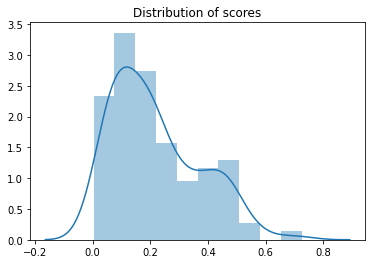

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(scores)
plt.title('Distribution of scores')

In [86]:
#TODO: also need to take into account the isomers, so need to calculate the formula
good_scores = []
bad_scores = []
minim = 1
for peak in peakinfolist:
    standards_kegg = peak.std_kegg_id
    if peak.best_ms2_match_adduct:
        ms2match = peak.best_ms2_match_adduct
        ms2match_kegg = metabolites[peak.best_ms2_match_adduct.hmdb][5]
    
    #get the scores for metabolites matching the standards annotation
        if standards_kegg == ms2match_kegg:
                    if ms2match.score < minim:
                        minim = ms2match.score
                    good_scores.append(ms2match.score)

                #get the scores for metabolites not matching with the standards annotation
        if standards_kegg != None:

                    if ms2match_kegg != standards_kegg:
                        #print(standards,i, name, score)
                        
                            bad_scores.append(ms2match.score)

        
print('Lowest score value for which the HMDB annotation matches with the ToxID annotation:',minim)

Lowest score value for which the HMDB annotation matches with the ToxID annotation: 0.27664475373310216


Text(0.5, 1.0, 'Distribution of good scores')

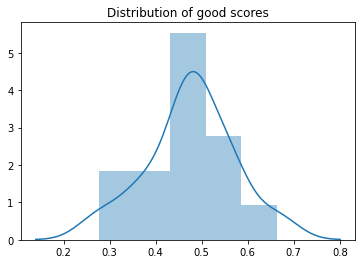

In [87]:
sns.distplot(good_scores)
plt.title('Distribution of good scores')

Text(0.5, 1.0, 'Distribution of bad scores')

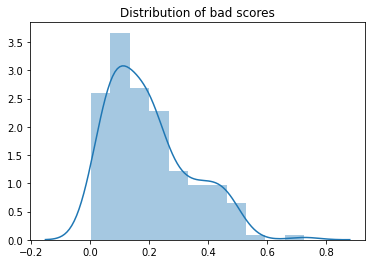

In [88]:
sns.distplot(bad_scores)
plt.title('Distribution of bad scores')

In [149]:
def plot_mirror(normalised_peaks_top, normalised_peaks_bottom):
    
    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0})

    for mz,intensity in normalised_peaks_top:
        axs[0].plot([mz,mz], [0,intensity], 'k', color = 'r')
        axs[0].set_ylabel("Aligner Spectrum")
        
    
    for mz,intensity in normalised_peaks_bottom:
        axs[1].plot([mz,mz],[0,-intensity],'k', color = 'b')
        axs[1].set_ylabel("HMDB Spectrum")
   
    # Hide x labels and tick labels for all but bottom plot.
    for ax in axs:
        ax.label_outer()
        xticks = ax.xaxis.get_major_ticks()
        xticks[0].label1.set_visible(False)
    plt.show()    
    


613 l-glutamine C00064 147.07640748274954 9.50855356149344e-10 -2.63034608332642
['l-glutamine$3-ureidoisobutyrate$d-glutamine; d-2-aminoglutaramic acid', '5,6-dihydrothymine'] C00906
{'frag_pos_mal': <mnet.Spectrum object at 0x12adbb940>, 'gnps2': <mnet.Spectrum object at 0x12adbba00>}


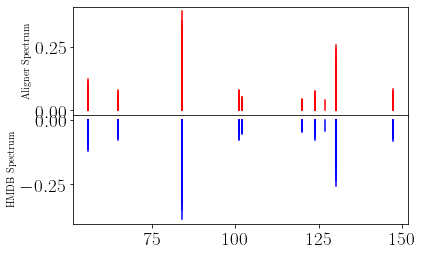

----
2989   810.6000113236278 2.21432944268004e-09 -1.7812251168870903
 
{'frag_pos_vl': <mnet.Spectrum object at 0x12afebb80>, 'gnps2': <mnet.Spectrum object at 0x12afebc40>}


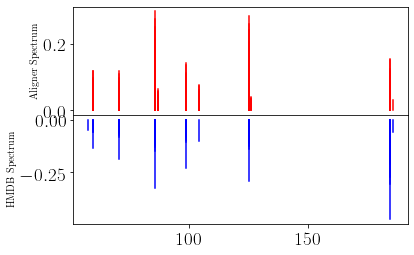

----
2936   782.5687384354442 3.0424836229794397e-09 -1.79450144331877
 
{'frag_pos_vl': <mnet.Spectrum object at 0x12afe4790>, 'gnps2': <mnet.Spectrum object at 0x12afe4850>}


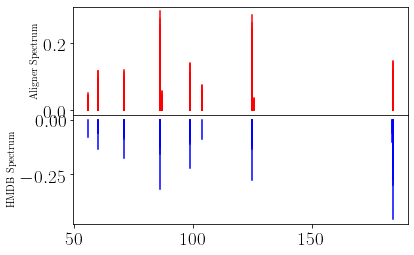

----
324 taurine C00245 126.0219806871916 3.3695815034334397e-09 -1.04710511580883
['taurine'] C00245
{'frag_pos_mal': <mnet.Spectrum object at 0x12b21f3d0>, 'frag_pos_vl': <mnet.Spectrum object at 0x12b21f490>}


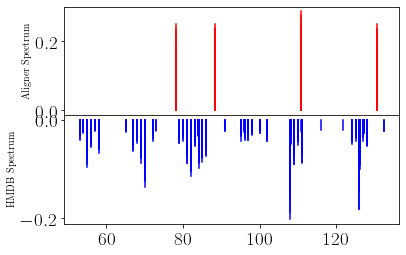

----
2720   520.3400409096166 1.9553429860501102e-07 -1.8785086352406397
 
{'frag_pos_vl': <mnet.Spectrum object at 0x12e5fac40>, 'gnps2': <mnet.Spectrum object at 0x12e5fad00>}


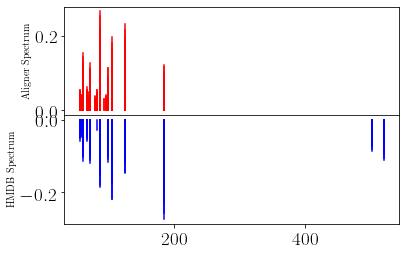

----
1993 sn-glycero-3-phosphocholine  258.1100018149928 5.17135144550214e-07 -1.2072506071780602
 
{'frag_pos_vl': <mnet.Spectrum object at 0x1267044c0>, 'gnps2': <mnet.Spectrum object at 0x126704580>}


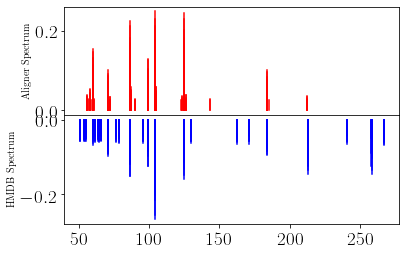

----
2942   786.6000470613177 8.868938122079821e-07 -0.810224881721162
 
{'frag_pos_vl': <mnet.Spectrum object at 0x12674a250>, 'gnps2': <mnet.Spectrum object at 0x12674a310>}


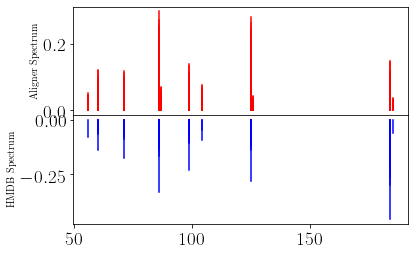

----
1839 l-cystine C00491 241.03100315217048 1.06985459550148e-05 -7.814946930091041
['l-cystine; l-dicysteine; l-alpha-diamino-beta-dithiolactic acid'] C00491
{'frag_pos_mal': <mnet.Spectrum object at 0x126898820>, 'gnps2': <mnet.Spectrum object at 0x1268988e0>}


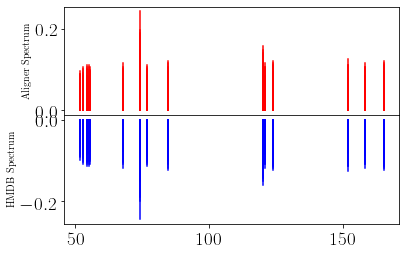

----
366 5-oxoproline  130.04995717500387 1.69222685515447e-05 -0.649141706140043
['5-oxoproline$l-1-pyrroline-3-hydroxy-5-carboxylate$1-pyrroline-4-hydroxy-2-carboxylate$5-oxo-l-proline', 'd-glutamate; d-glutamic acid; d-glutaminic acid; d-2-aminoglutaric acid$l-glutamate$l-4-hydroxyglutamate semialdehyde'] C00217;C00025;C05938
{'frag_pos_mal': <mnet.Spectrum object at 0x126a980a0>, 'frag_pos_vl': <mnet.Spectrum object at 0x126a98160>}


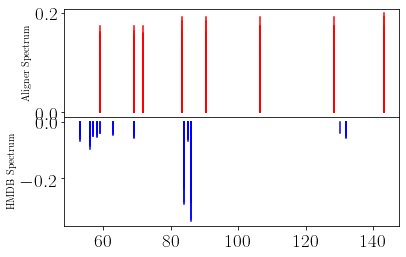

----
2664   468.30843577665433 2.1023052578718697e-05 -7.16605473174531
['timnodonyl carnitine'] tmndnccrn
{'frag_pos_mal': <mnet.Spectrum object at 0x126a98e50>, 'frag_pos_vl': <mnet.Spectrum object at 0x126a98f10>, 'gnps2': <mnet.Spectrum object at 0x126a98fd0>}


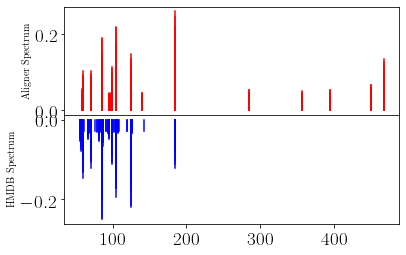

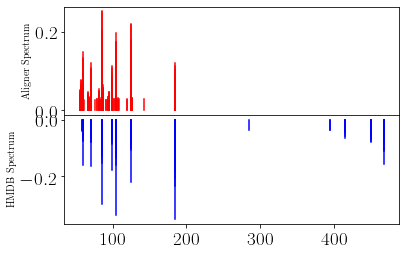

----
2151   279.15896526135896 0.000116820233690096 -0.6153697696145001
 
{'frag_pos_vl': <mnet.Spectrum object at 0x126c5ca90>, 'gnps2': <mnet.Spectrum object at 0x126c5cb50>}


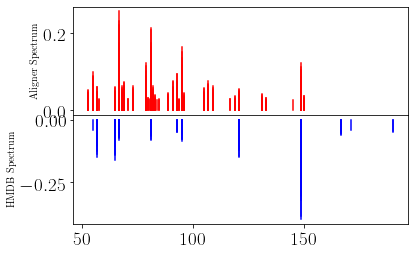

----
667 l-methionine C00073 150.05838434319747 0.000130149780322985 -1.65735553998747
['l-methionine'] C00073
{'frag_pos_mal': <mnet.Spectrum object at 0x126dc6df0>, 'gnps2': <mnet.Spectrum object at 0x126dc6eb0>}


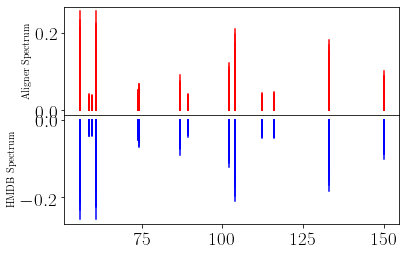

----
1100   181.0720427293044 0.000303128645819538 -6.5173316425727705
['1,7-dimethylxanthine; paraxanthine$'] C13747;C07480
{'frag_pos_mal': <mnet.Spectrum object at 0x126f23820>, 'frag_pos_vl': <mnet.Spectrum object at 0x126f238e0>, 'gnps2': <mnet.Spectrum object at 0x126f239a0>}


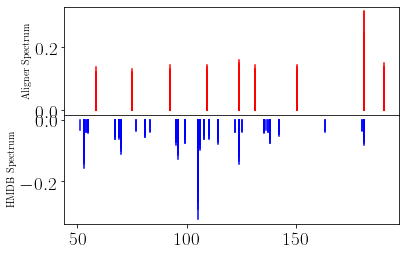

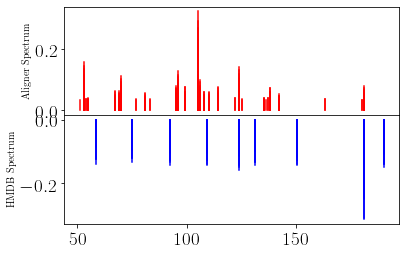

----
264   120.0808048248291 0.00040734256784672097 0.43672795603462705
['l-phenylalanine$', 'tyramine$n,n-dimethylaniline n-oxide$phenylethanolamine; 2-amino-1-phenylethanol'] C00483;C01183;C02735
{'frag_pos_vl': <mnet.Spectrum object at 0x1270bd700>, 'gnps2': <mnet.Spectrum object at 0x1270bd7c0>}


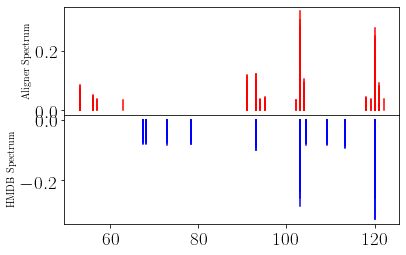

----
1401   203.05238235473632 0.00134388723281376 7.995276342107531
['d-glucose$beta-d-glucose$l-sorbose; l-xylo-hexulose$beta-d-fructose; beta-fruit sugar; beta-d-arabino-hexulose; beta-levulose; fructose$alpha-d-glucose$d-hexose$$d-fructose$beta-d-galactose$galactose$d-tagatose; lyxo-hexulose$myo-inositol$glucose$d-galactose$alpha-d-galactose$d-mannose'] C00031;C00221;C00247;C02336;C00267;C00738;C00936;C00095;C00962;C01582;C00795;C00137;C00293;C00124;C00984;C00159
{'frag_pos_mal': <mnet.Spectrum object at 0x127485340>, 'frag_pos_vl': <mnet.Spectrum object at 0x127485400>}


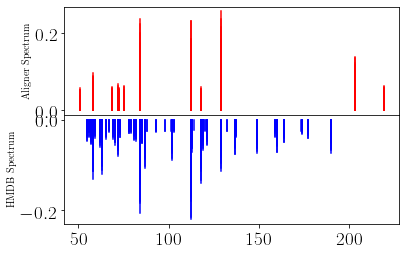

----
298 nicotinamide  123.05528043445787 0.00137782275567553 -0.5728940387899039
['nicotinamide', '3-methylimidazoleacetic acid'] C05828
{'frag_pos_mal': <mnet.Spectrum object at 0x1274e7d60>, 'gnps2': <mnet.Spectrum object at 0x1274e7e20>}


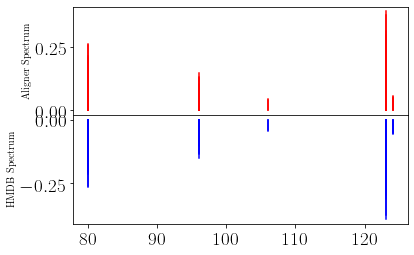

----
1229   190.08622629502239 0.00163639633924719 -4.750123753699389
['methyl indole-3-acetate'] CE2122
{'frag_pos_mal': <mnet.Spectrum object at 0x127605fa0>, 'gnps2': <mnet.Spectrum object at 0x1276130a0>}


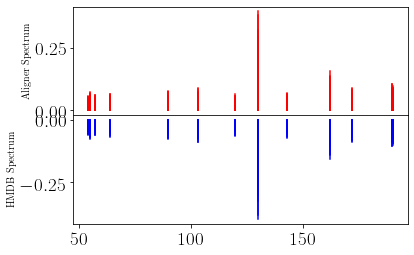

----
2234   288.2168204171317 0.00175192263304081 -4.42697382769785
['l-octanoylcarnitine'] C02838
{'frag_pos_vl': <mnet.Spectrum object at 0x12762d700>, 'gnps2': <mnet.Spectrum object at 0x12762d7c0>}


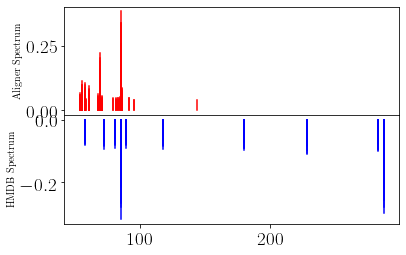

----
1089   180.15944360431868 0.00219386100888766 0.560347284001462
 
{'frag_pos_mal': <mnet.Spectrum object at 0x1277f9280>, 'gnps2': <mnet.Spectrum object at 0x1277f9340>}


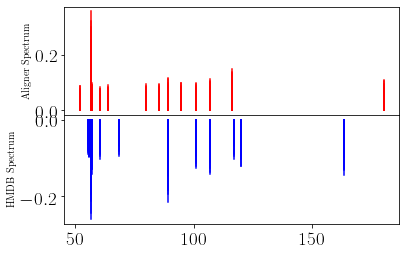

----
2744   544.3396243533573 0.00383774666542568 -3.06113272483078
 
{'frag_pos_vl': <mnet.Spectrum object at 0x127975610>, 'gnps2': <mnet.Spectrum object at 0x1279756d0>}


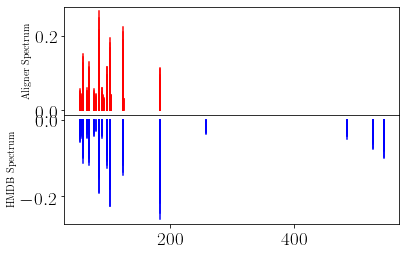

----
424 glycylglycine  133.06076973362974 0.00411699896895725 -0.563278369095048
['n-carbamoyl-beta-alanine$l-asparagine'] C02642;C00152
{'frag_pos_mal': <mnet.Spectrum object at 0x1279a9250>, 'frag_pos_vl': <mnet.Spectrum object at 0x1279a9310>}


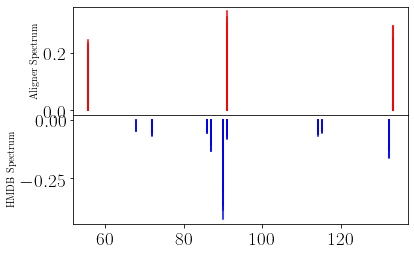

----
599   146.08119874251517 0.0060061446619100395 0.516617388800999
['6-amino-2-oxohexanoate; 2-oxo-6-aminocaproate$4-acetamidobutanoate$l-2-aminoadipate 6-semialdehyde; 2-aminoadipate 6-semialdehyde'] C03239;C02946;C04076
{'frag_pos_mal': <mnet.Spectrum object at 0x127abfd60>, 'frag_pos_vl': <mnet.Spectrum object at 0x127abfe20>}


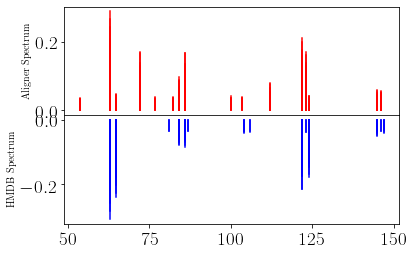

----
4109   287.0999953746796 0.00605037574182198 -5.28264613797675
['alpha-n-phenylacetyl-l-glutamine$formyl-n-acetyl-5-methoxykynurenamine'] C04148;C05642
{'frag_pos_mal': <mnet.Spectrum object at 0x127ad3b50>, 'gnps2': <mnet.Spectrum object at 0x127ad3c10>}


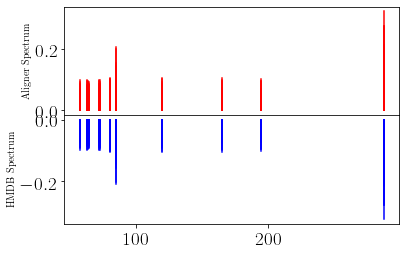

----
2351   310.20132788296405 0.00975833749417887 -4.70924553640043
 
{'frag_pos_mal': <mnet.Spectrum object at 0x127daec70>, 'gnps2': <mnet.Spectrum object at 0x127daed30>}


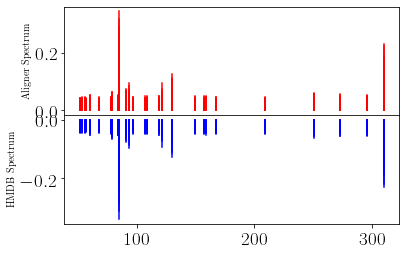

----
1033   176.07068128988774 0.0107514502058185 -3.11055939780338
['indole-3-acetate$5-hydroxyindoleacetaldehyde', '4-hydroxy-5-phenyltetrahydro-1,3-oxazin-2-one$3-carbamoyl-2-phenylpropionaldehyde'] C16595;C16587
{'frag_pos_mal': <mnet.Spectrum object at 0x127e47280>, 'gnps2': <mnet.Spectrum object at 0x127e47340>}


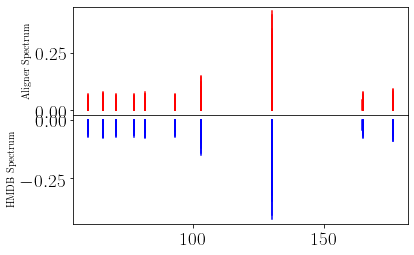

----
2799   614.5354108418503 0.0149868682874702 -2.7421054758399
 
{'frag_pos_mal': <mnet.Spectrum object at 0x127f4f9d0>, 'gnps2': <mnet.Spectrum object at 0x127f4fa90>}


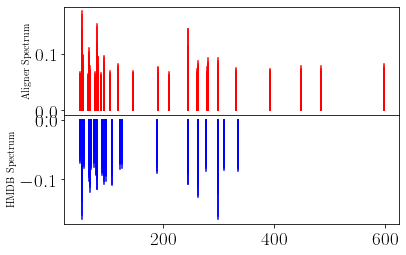

----
1439 l-tryptophan C00078 205.09726213154042 0.0198232026249283 -0.31578520256663
['l-tryptophan$d-tryptophan'] C00078;C00525
{'frag_pos_mal': <mnet.Spectrum object at 0x128083d30>, 'frag_pos_vl': <mnet.Spectrum object at 0x128083df0>, 'gnps2': <mnet.Spectrum object at 0x128083eb0>}


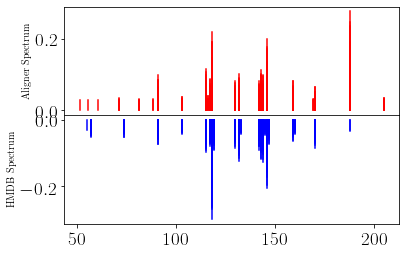

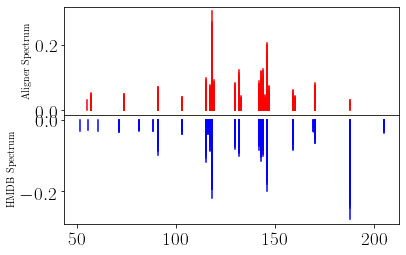

----
122   104.07060181467155 0.045180604519689 0.206239508030393
['(s)-2-aminobutanoate; (s)-2-aminobutanoic acid; (s)-2-aminobutyric acid$n,n-dimethylglycine; dimethylglycine$4-aminobutanoate$3-aminoisobutyric acid; 3-aminoisobutanoate; 3-amino-2-methylpropanoate$d-3-amino-isobutanoate$l-3-amino-isobutanoate'] C02356;C01026;C00334;C05145;C01205;C03284
{'frag_pos_vl': <mnet.Spectrum object at 0x1284c2d30>, 'gnps2': <mnet.Spectrum object at 0x1284c2df0>}


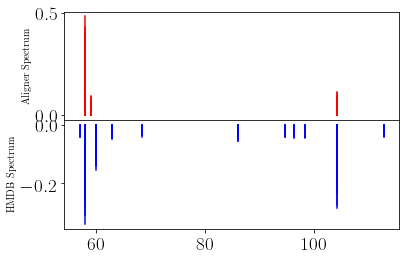

----
2322   304.24814770672765 0.0493499530162028 -2.2049333714837402
 
{'frag_pos_mal': <mnet.Spectrum object at 0x1284f2070>, 'gnps2': <mnet.Spectrum object at 0x1284f2130>}


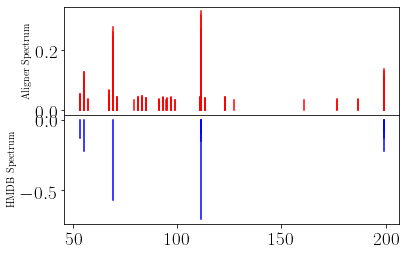

----
5793   128.07060296194894 0.0570773033773801 -2.3045954059073304
['6-amino-2-oxohexanoate; 2-oxo-6-aminocaproate$4-acetamidobutanoate$l-2-aminoadipate 6-semialdehyde; 2-aminoadipate 6-semialdehyde', 'delta1-piperideine-2-carboxylate; 1,2-didehydropiperidine-2-carboxylate$2,3,4,5-tetrahydropyridine-2-carboxylate; delta1-piperideine-6-l-carboxylate'] C04092;C00450
{'frag_pos_mal': <mnet.Spectrum object at 0x12862be20>, 'frag_pos_vl': <mnet.Spectrum object at 0x12862bee0>, 'gnps2': <mnet.Spectrum object at 0x12862bfa0>}


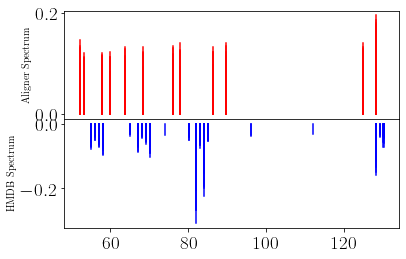

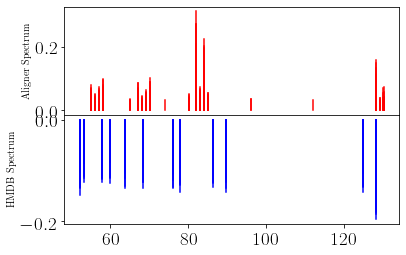

----
2824   663.4531615407842 0.0630616682006889 0.40548044037187503
 
{'frag_pos_mal': <mnet.Spectrum object at 0x1286fb550>, 'gnps2': <mnet.Spectrum object at 0x1286fb610>}


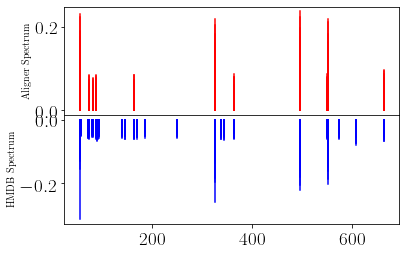

----
2038   265.11811306602084 0.0736694066726246 -0.539121773311887
['alpha-n-phenylacetyl-l-glutamine$formyl-n-acetyl-5-methoxykynurenamine'] C04148;C05642
{'frag_pos_mal': <mnet.Spectrum object at 0x1287b1550>, 'frag_pos_vl': <mnet.Spectrum object at 0x1287b1610>, 'gnps2': <mnet.Spectrum object at 0x1287b16d0>}


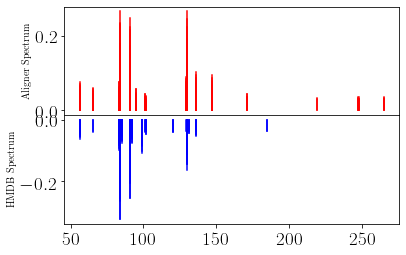

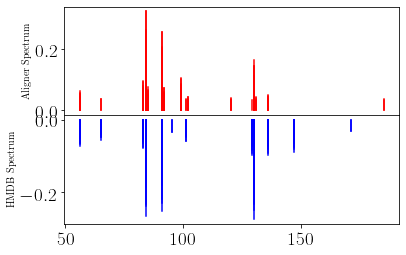

----
1068   178.07238173811402 0.0824982534802742 -1.71359852584277
 
{'frag_pos_mal': <mnet.Spectrum object at 0x128891c40>, 'frag_pos_vl': <mnet.Spectrum object at 0x128891d00>}


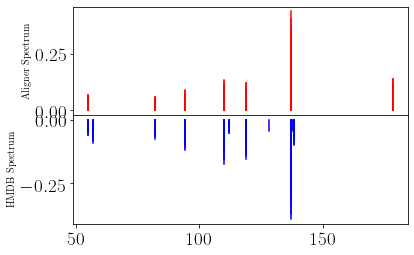

----
2478   344.22783126831047 0.125059142071159 -2.80522872353989
 
{'frag_pos_mal': <mnet.Spectrum object at 0x128c109a0>, 'gnps2': <mnet.Spectrum object at 0x128c10a60>}


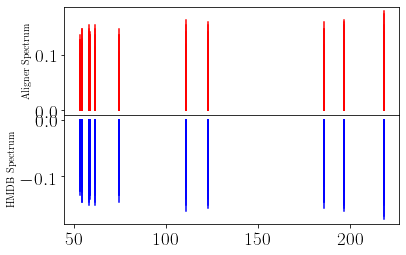

----
704   153.06587871752288 0.128378222466171 0.359394555950587
["n1-methyl-2-pyridone-5-carboxamide; n'-methyl-2-pyridone-5-carboxamide; 1-methyl-5-carboxylamide-2-pyridone$n1-methyl-4-pyridone-5-carboxamide; n'-methyl-4-pyridone-5-carboxamide; 1-methyl-4-pyridone-3-carboximide"] C05842;C05843
{'frag_pos_vl': <mnet.Spectrum object at 0x128c366a0>, 'gnps2': <mnet.Spectrum object at 0x128c36760>}


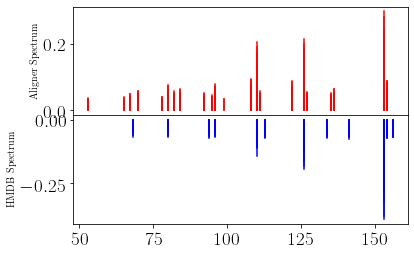

----
187 creatinine C00791 114.09845822477993 0.154923868219616 -1.18482914610513
 
{'frag_pos_mal': <mnet.Spectrum object at 0x128f98460>, 'frag_pos_vl': <mnet.Spectrum object at 0x128f98520>}


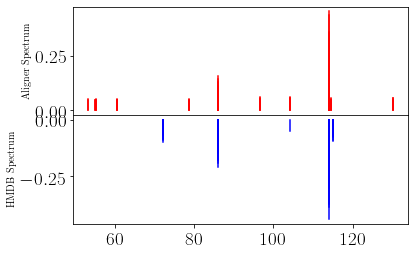

----
855   163.10959444547953 0.16039091289363502 0.159511040187969
 
{'frag_pos_vl': <mnet.Spectrum object at 0x128fbeca0>, 'gnps2': <mnet.Spectrum object at 0x128fbed60>}


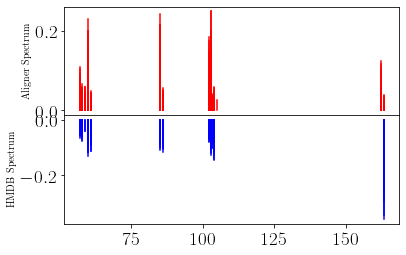

----
2803   619.4907287597656 0.166473945181795 -2.5660177375789397
 
{'frag_pos_mal': <mnet.Spectrum object at 0x128ff44c0>, 'gnps2': <mnet.Spectrum object at 0x128ff4580>}


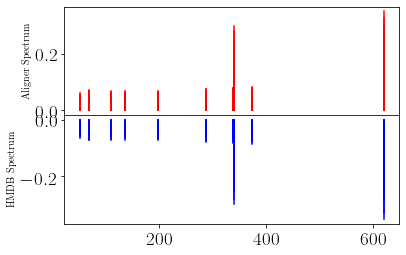

----
2779   592.4934650577911 0.177955177373233 -1.4568025822947
 
{'frag_pos_mal': <mnet.Spectrum object at 0x12904e130>, 'gnps2': <mnet.Spectrum object at 0x12904e1f0>}


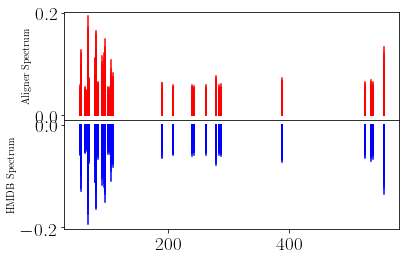

----
1419 o-acetylcarnitine  204.12314158121742 0.182177609989358 -1.2209154477171498
 
{'frag_pos_mal': <mnet.Spectrum object at 0x1290f7850>, 'gnps2': <mnet.Spectrum object at 0x1290f7910>}


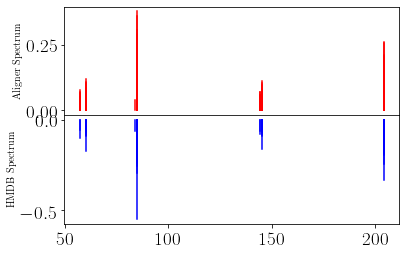

----
3642   180.0655281278822 0.184527382786427 -1.53007627880924
['4-(2-aminophenyl)-2,4-dioxobutanoate', 'adrenochrome$hippurate; hippuric acid; n-benzoylglycine; benzoylaminoacetic acid', '3,4-dihydroxy-l-phenylalanine'] C00355
{'frag_pos_mal': <mnet.Spectrum object at 0x129148640>, 'frag_pos_vl': <mnet.Spectrum object at 0x129148700>}


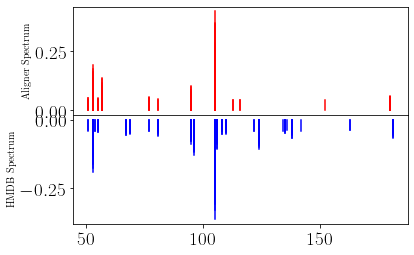

----
1544   214.25295069597766 0.18519860890689702 -1.72701757147017
 
{'frag_pos_mal': <mnet.Spectrum object at 0x12917a430>, 'frag_pos_vl': <mnet.Spectrum object at 0x12917a4f0>, 'gnps2': <mnet.Spectrum object at 0x12917a5b0>}


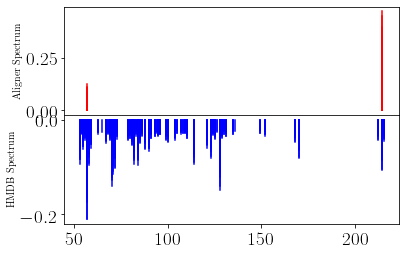

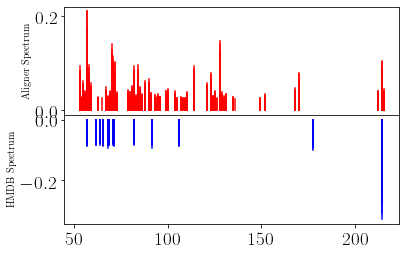

----
417 l-leucine C00123 132.10193634033206 0.20232800026078798 0.171461238144822
['5-acetamidopentanoate', 'l-leucine$l-isoleucine'] C00123;C00407
{'frag_pos_mal': <mnet.Spectrum object at 0x12927b700>, 'frag_pos_vl': <mnet.Spectrum object at 0x12927b7c0>, 'gnps2': <mnet.Spectrum object at 0x12927b880>}


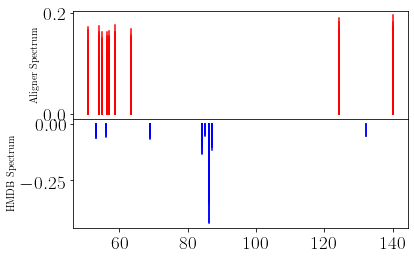

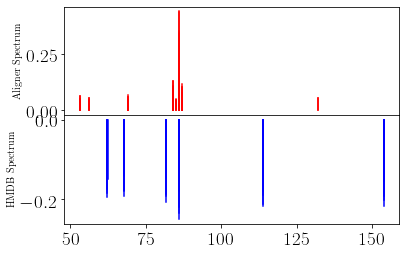

----
413   132.0655572221086 0.242164369652775 -1.1084977203776298
['l-glutamate 5-semialdehyde; l-glutamate gamma-semialdehyde$trans-4-hydroxy-l-proline$5-aminolevulinate; 5-amino-4-oxopentanoate; 5-amino-4-oxovaleric acid$cis-4-hydroxy-d-proline$5-amino-2-oxopentanoic acid; 5-amino-2-oxopentanoate; 2-oxo-5-amino-pentanoate; 2-oxo-5-aminopentanoate; alpha-keto-delta-aminopentanoate; 2-oxo-5-aminovalerate', '1-pyrroline-5-carboxylate$1-pyrroline-2-carboxylate; 1-pyrroline-2-carboxylic acid; delta1-pyrroline 2-carboxylate', '2-amino-4-oxopentanoic acid; 2-amino-4-oxopentanoate'] C03341
{'frag_pos_mal': <mnet.Spectrum object at 0x12944ddf0>, 'frag_pos_vl': <mnet.Spectrum object at 0x12944deb0>}


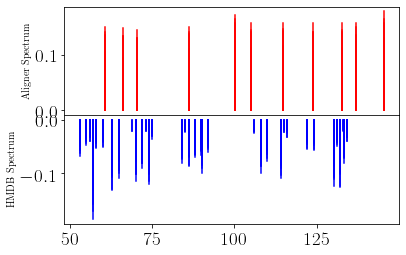

----
996   173.12855569939862 0.257482906957171 0.15309332083269597
 
{'frag_pos_mal': <mnet.Spectrum object at 0x1294e9460>, 'frag_pos_vl': <mnet.Spectrum object at 0x1294e9520>, 'gnps2': <mnet.Spectrum object at 0x1294e95e0>}


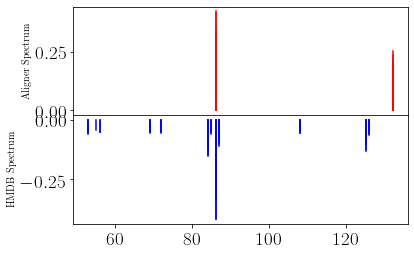

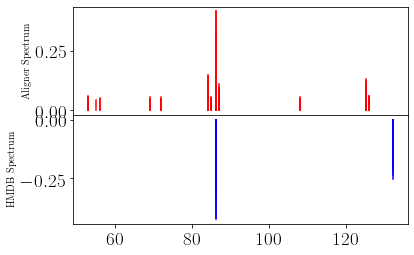

----
737   156.0768249099319 0.278638899335418 1.3576680670986598
['5-guanidino-2-oxopentanoate; 5-guanidino-2-oxo-pentanoate; 2-oxo-5-guanidinopentanoate; 2-oxo-5-guanidino-pentanoate', 'l-histidine'] C00135
{'frag_pos_mal': <mnet.Spectrum object at 0x12959fa60>, 'gnps2': <mnet.Spectrum object at 0x12959fb20>}


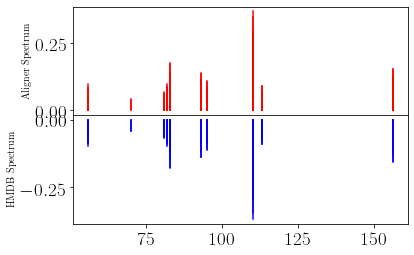

----
2820   654.331636428833 0.31270496333452896 -1.28423320935186
 
{'frag_pos_mal': <mnet.Spectrum object at 0x1297b6fd0>, 'gnps2': <mnet.Spectrum object at 0x1297cb0d0>}


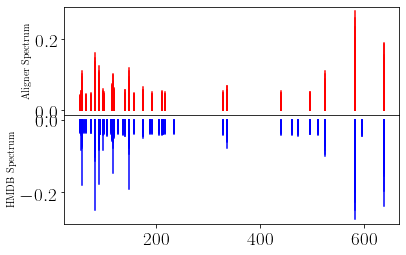

----
49   86.09640022803997 0.327628265285334 2.2426128000308396
['n4-acetylaminobutanal$l-pipecolate; pipecolinic acid; pipecolic acid; 2-piperidinecarboxylic acid', 'l-leucine$l-isoleucine'] C00123;C00407
{'frag_pos_mal': <mnet.Spectrum object at 0x12983c7c0>, 'frag_pos_vl': <mnet.Spectrum object at 0x12983c880>}


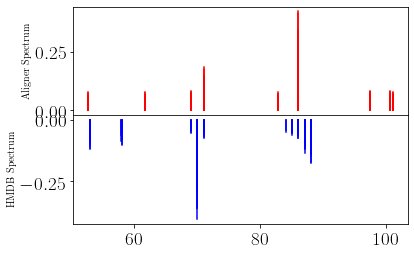

----
2019   262.1436151203356 0.330339114049709 -0.0808118011285011
 
{'frag_pos_mal': <mnet.Spectrum object at 0x12988f520>, 'gnps2': <mnet.Spectrum object at 0x12988f5e0>}


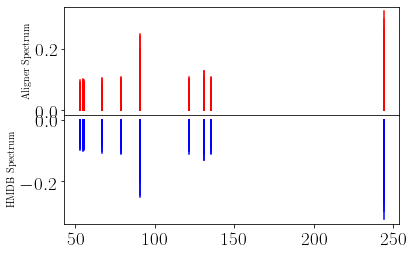

----
1712   229.15466378864485 0.354503236329369 0.15445863373069502
 
{'frag_pos_mal': <mnet.Spectrum object at 0x129a05520>, 'gnps2': <mnet.Spectrum object at 0x129a055e0>}


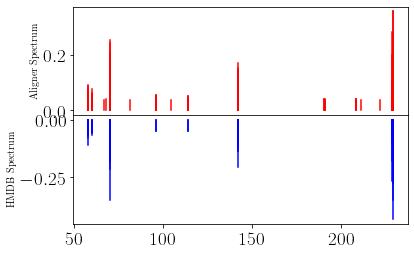

----
2451   338.3416043599446 0.361302119467052 1.75624155651328
 
{'frag_pos_vl': <mnet.Spectrum object at 0x129a8ff10>, 'gnps2': <mnet.Spectrum object at 0x129a8ffd0>}


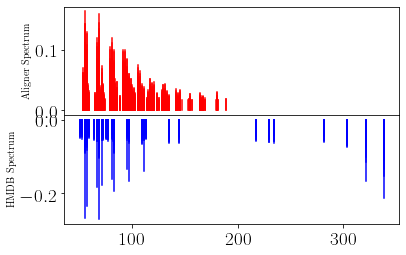

----
1363   200.02707190262643 0.40991395810203796 -0.079473268388778
 
{'frag_pos_mal': <mnet.Spectrum object at 0x129d423a0>, 'frag_pos_vl': <mnet.Spectrum object at 0x129d42460>}


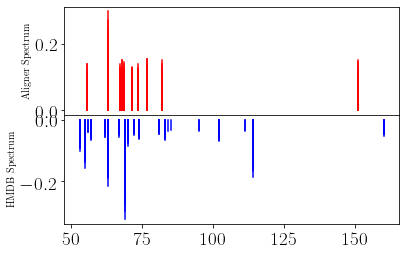

----
2680   482.36055799211766 0.423657679057139 -1.0415021577472299
 
{'frag_pos_vl': <mnet.Spectrum object at 0x129d92280>, 'gnps2': <mnet.Spectrum object at 0x129d92340>}


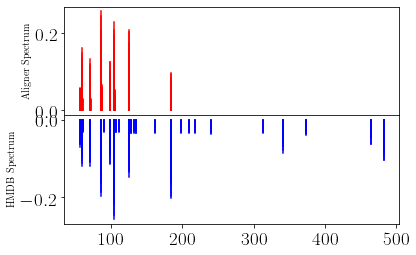

----
125   104.10696566944391 0.447713075053 1.00945547849601
['l-leucine$l-isoleucine'] C00123;C00407
{'frag_pos_mal': <mnet.Spectrum object at 0x129e03af0>, 'gnps2': <mnet.Spectrum object at 0x129e03bb0>}


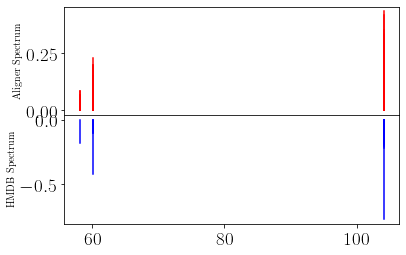

----
344   129.06585633127312 0.44811695029555204 0.149806584389648
['l-glutamine$3-ureidoisobutyrate$d-glutamine; d-2-aminoglutaramic acid', '5,6-dihydrothymine', '4-guanidinobutanoate'] C01035
{'frag_pos_mal': <mnet.Spectrum object at 0x129e10820>, 'frag_pos_vl': <mnet.Spectrum object at 0x129e108e0>}


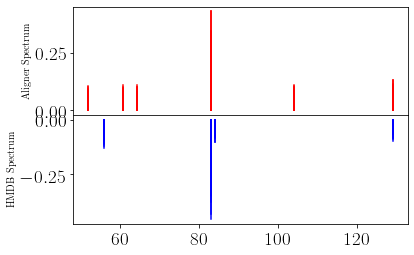

----
915 pyridoxal C00250 168.06575625550514 0.46278646129455797 1.6213347296123999
['pyridoxal'] C00250
{'frag_pos_mal': <mnet.Spectrum object at 0x129f64d00>, 'gnps2': <mnet.Spectrum object at 0x129f64dc0>}


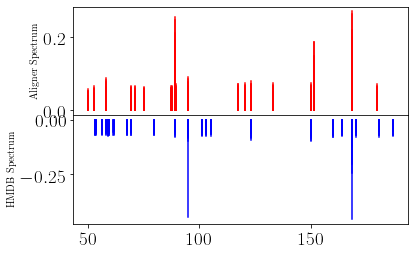

----
1970   256.1654001871745 0.5040128029177671 -0.4651602152526911
 
{'frag_pos_mal': <mnet.Spectrum object at 0x12a13a400>, 'gnps2': <mnet.Spectrum object at 0x12a13a4c0>}


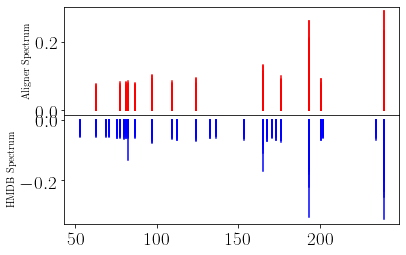

----
254   119.08341081518877 0.513632726379003 0.0880731209142382
 
{'frag_pos_vl': <mnet.Spectrum object at 0x12a36c160>, 'gnps2': <mnet.Spectrum object at 0x12a36c220>}


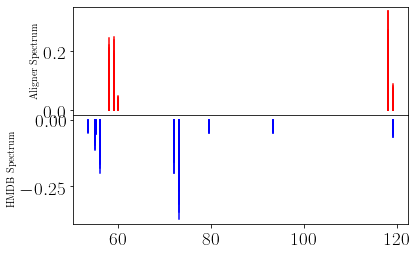

----
418   132.1019279078433 0.523123926133732 -0.0352650335794138
['5-acetamidopentanoate', 'l-leucine$l-isoleucine'] C00123;C00407
{'frag_pos_mal': <mnet.Spectrum object at 0x12a3b6eb0>, 'frag_pos_vl': <mnet.Spectrum object at 0x12a3b6f70>}


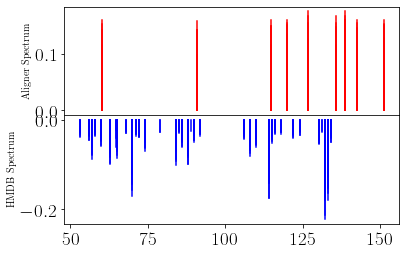

----
1901   247.14402987505935 0.531387891678788 -0.484207257558655
 
{'frag_pos_mal': <mnet.Spectrum object at 0x12a40ab20>, 'frag_pos_vl': <mnet.Spectrum object at 0x12a40abe0>, 'gnps2': <mnet.Spectrum object at 0x12a40aca0>}


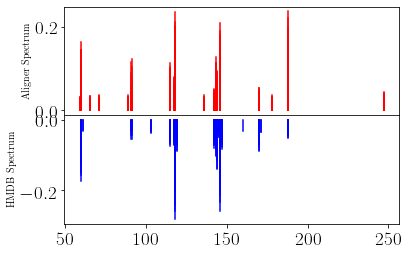

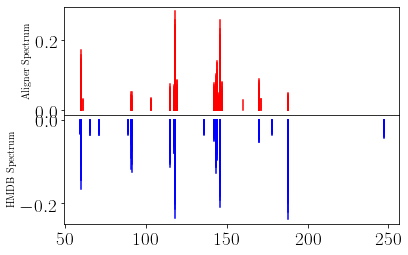

----
412 5-aminolevulinate  132.06559622915168 0.541031612632117 0.12047423714031401
['l-glutamate 5-semialdehyde; l-glutamate gamma-semialdehyde$trans-4-hydroxy-l-proline$5-aminolevulinate; 5-amino-4-oxopentanoate; 5-amino-4-oxovaleric acid$cis-4-hydroxy-d-proline$5-amino-2-oxopentanoic acid; 5-amino-2-oxopentanoate; 2-oxo-5-amino-pentanoate; 2-oxo-5-aminopentanoate; alpha-keto-delta-aminopentanoate; 2-oxo-5-aminovalerate', '2-amino-4-oxopentanoic acid; 2-amino-4-oxopentanoate'] C03341
{'frag_pos_vl': <mnet.Spectrum object at 0x12a519a30>, 'gnps2': <mnet.Spectrum object at 0x12a519af0>}


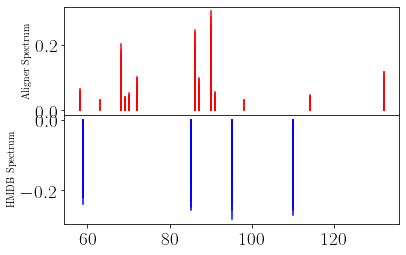

----
848 l-carnitine C00318 162.1124855982114 0.5419641176330751 -0.960372948379021
['l-carnitine'] C00318
{'frag_pos_mal': <mnet.Spectrum object at 0x12a5307c0>, 'gnps2': <mnet.Spectrum object at 0x12a530880>}


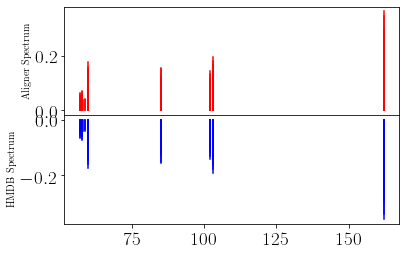

----
10779 n(pi)-methyl-l-histidine  170.0924298604329 0.547709882441706 1.67430956497127
['n(pi)-methyl-l-histidine; 1-methylhistidine; n-pros-methyl-l-histidine'] C01152
{'frag_pos_vl': <mnet.Spectrum object at 0x12a5629d0>, 'gnps2': <mnet.Spectrum object at 0x12a562a90>}


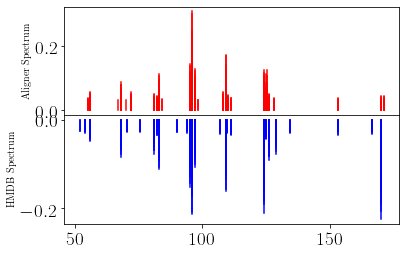

----
895 l-phenylalanine C00079 166.08632090250651 0.549298729914555 -0.530904801135591
['l-phenylalanine$', 'l-normetanephrine$l-adrenaline; (r)-(-)-adrenaline; (r)-(-)-epinephrine; (r)-(-)-epirenamine; (r)-(-)-adnephrine; 4-[(1r)-1-hydroxy-2-(methylamino)ethyl]-1,2-benzenediol'] C05589;C00788
{'frag_pos_vl': <mnet.Spectrum object at 0x12a5dd310>, 'gnps2': <mnet.Spectrum object at 0x12a5dd3d0>}


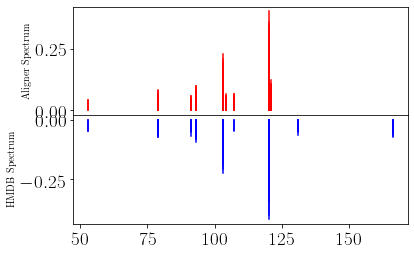

----
239 betaine C00719 118.07718507867109 0.606928261070307 -0.0643126611312113
 
{'frag_pos_mal': <mnet.Spectrum object at 0x12a76a8e0>, 'frag_pos_vl': <mnet.Spectrum object at 0x12a76a9a0>}


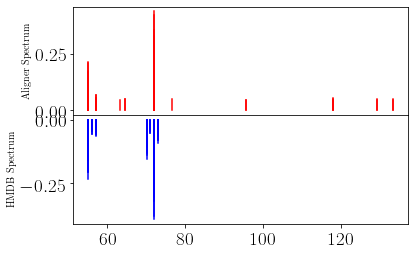

----
183 creatinine C00791 114.06623158310398 0.6091047564053511 1.31999040878948
['creatine; alpha-methylguanidino acetic acid; methylglycocyamine', 'nan'] C00791
{'frag_pos_mal': <mnet.Spectrum object at 0x12a78e6d0>, 'frag_pos_vl': <mnet.Spectrum object at 0x12a78e790>, 'gnps2': <mnet.Spectrum object at 0x12a78e850>}


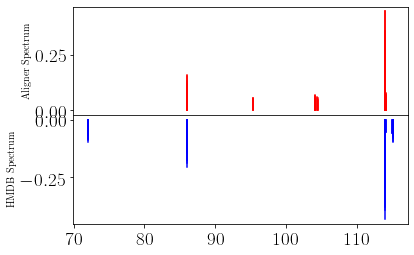

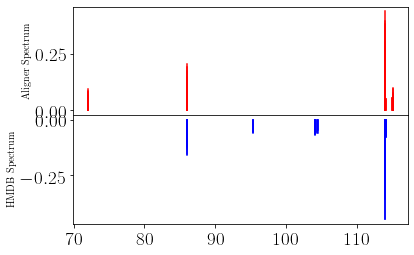

----
1684   228.12308822852975 0.638860169413339 -0.740976855234432
 
{'frag_pos_mal': <mnet.Spectrum object at 0x12a9281f0>, 'gnps2': <mnet.Spectrum object at 0x12a9282b0>}


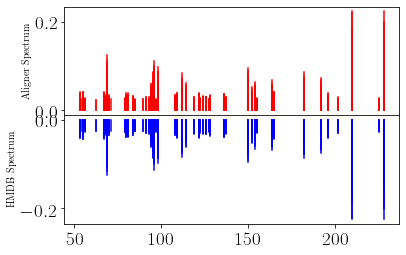

----
2293   300.20143837764346 0.6878075970588289 -0.7667547986143249
 
{'frag_pos_mal': <mnet.Spectrum object at 0x12ab06160>, 'gnps2': <mnet.Spectrum object at 0x12ab06220>}


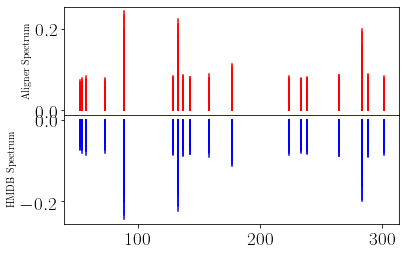

----
416 5-aminolevulinate  132.07676277160644 0.7853164680785569 -0.7517655183635229
['creatine; alpha-methylguanidino acetic acid; methylglycocyamine', 'nan'] C00791
{'frag_pos_mal': <mnet.Spectrum object at 0x12ae19e50>, 'gnps2': <mnet.Spectrum object at 0x12ae19f10>}


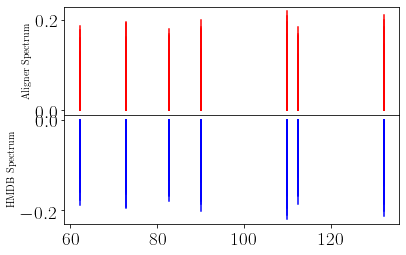

----
1150   185.1285421708051 0.8145067431276091 -0.36517998718167605
 
{'frag_pos_mal': <mnet.Spectrum object at 0x12b00a340>, 'frag_pos_vl': <mnet.Spectrum object at 0x12b00a400>, 'gnps2': <mnet.Spectrum object at 0x12b00a4c0>}


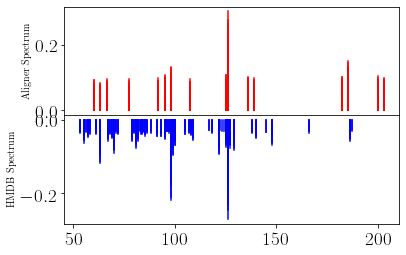

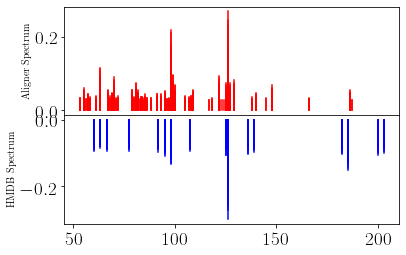

----
6   72.08080402173493 0.8543183874297621 -0.0180060231432506
['glycine betaine$5-aminopentanoate; 5-aminopentanoic acid; 5-aminovaleric acid$l-valine'] C00719;C00431;C00183
{'frag_pos_mal': <mnet.Spectrum object at 0x12b198430>, 'frag_pos_vl': <mnet.Spectrum object at 0x12b1984f0>}


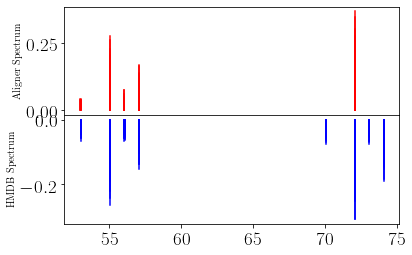

----
1822   239.13897132873532 0.8951320771913521 -0.0142660461151394
 
{'frag_pos_mal': <mnet.Spectrum object at 0x12b2a6e50>, 'frag_pos_vl': <mnet.Spectrum object at 0x12b2a6f10>}


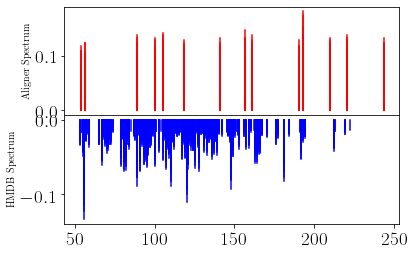

----
805   159.11286996540267 0.9097919826118991 -0.0102167342489565
 
{'frag_pos_vl': <mnet.Spectrum object at 0x12d10bdc0>, 'gnps2': <mnet.Spectrum object at 0x12d10be80>}


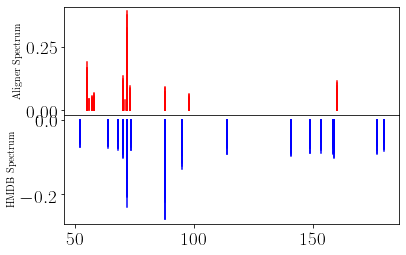

----
683   151.09652974870468 0.93636966162983 -0.10568427625881698
 
{'frag_pos_mal': <mnet.Spectrum object at 0x12d164820>, 'gnps2': <mnet.Spectrum object at 0x12d1648e0>}


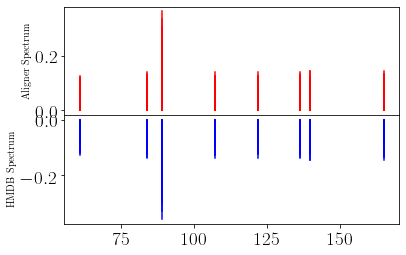

----
240 betaine C00719 118.08624432538006 0.9782963174168711 -0.0356890921986768
['6-amino-2-oxohexanoate; 2-oxo-6-aminocaproate$4-acetamidobutanoate$l-2-aminoadipate 6-semialdehyde; 2-aminoadipate 6-semialdehyde', 'glycine betaine$5-aminopentanoate; 5-aminopentanoic acid; 5-aminovaleric acid$l-valine', 'l-2-aminoadipate; l-alpha-aminoadipate; l-alpha-aminoadipic acid; l-2-aminoadipic acid; l-2-aminohexanedioate'] C00956
{'frag_pos_vl': <mnet.Spectrum object at 0x12d212e50>, 'gnps2': <mnet.Spectrum object at 0x12d212f10>}


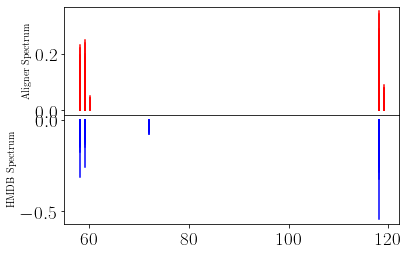

----
175 creatinine C00791 114.03404131802642 0.9917762908608689 -0.0293358220104984
 
{'frag_pos_mal': <mnet.Spectrum object at 0x12d25d220>, 'frag_pos_vl': <mnet.Spectrum object at 0x12d25d2e0>}


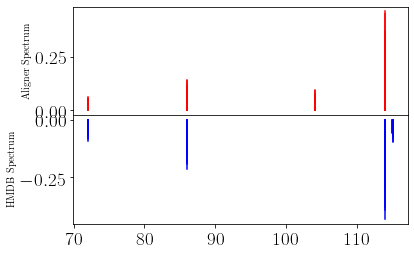

----


In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
for peak in peakinfolist_positive:
    
    if peak.pval!=0:
        
        if peak.spectra:

            spectra = peak.spectra
            
            num_spec = len(spectra)
            
            if num_spec > 1:
                
                
                print(peak.cid, peak.std_annotation, peak.std_kegg_id, peak.mz, peak.pval, peak.logfc)
                print(peak.mm_annotation, peak.mm_kegg_id)
                print(spectra)
        
                for i in range(num_spec-1):
                    
                    

                    plot_mirror(spectra[list(spectra.keys())[i]].normalised_peaks, 
                                spectra[list(spectra.keys())[i+1]].normalised_peaks)
                    
                    plt.show()
                print('----')
        

In [97]:
for peak in peakinfolist:
    peak.add_ms2_match(metabolites, 0.3)
    
peakinfolist.sort(key = lambda peak: peak.pval, reverse = False)

In [8]:
samples_values_positive = pd.read_csv(osp+'/positive_mode/filtered_samples_log_description.csv', index_col = 0)
samples_values_filled_positive = pd.read_csv(osp+'/positive_mode/filtered_samples_log_filled_description.csv', index_col = 0)

samples_values_negative = pd.read_csv(osp+'/negative_mode/filtered_samples_log_description.csv', index_col=0)
samples_values_filled_negative = pd.read_csv(osp+'/negative_mode/filtered_samples_log_filled_description.csv', index_col=0)

In [38]:
samples_values_positive = pd.read_csv(osp+
        '/positive_mode/samples_including_hat/filtered_samples_including_hat_filled_description.csv', index_col = 0)

In [8]:
peakinfolist_positive.sort(key = lambda peak: peak.pval, reverse = False)
peakinfolist_negative.sort(key = lambda peak: peak.pval, reverse = False)

In [25]:
kegg_list = []
cid_list = []
for peak in peakinfolist_negative:
    if peak.pval != 0 and peak.pval < 0.05:
        keggs = peak.get_possible_kegg_ids()
        if keggs is not None:
            for kegg in keggs:
                kegg_list.append(kegg)
                cid_list.append(peak.cid)
for peak in peakinfolist_positive:
    if peak.pval != 0 and peak.pval < 0.05:
        keggs = peak.get_possible_kegg_ids()
        if keggs is not None:
            for kegg in keggs:
                kegg_list.append(kegg)
                cid_list.append(peak.cid)

        

None
['C05984' 'C01089' 'C03197' 'C06001' 'C00989']
None
None
None
['C04717' 'C14827']
None
None
['C00064' 'C05100' 'C00819']
['C01595']
['C00233' 'C06102' 'C03465']
['C00418']
None
None
['C00256' 'C01013' 'C00186' 'C00184']
['C00256' 'C01013' 'C00186' 'C00184']
None
['C00064' 'C05100' 'C00819']
['C00258']
None
None
['C06124']
None
None
None
None
None
None
None
None
['C00245']
None
None
['C00026']
['C00209']
['C04555']
None
None
None
None
['C06124']
None
['C00491']
None
['C00141']
None
['C00149']
None
None
None
['C00031' 'C00221' 'C00247' 'C02336' 'C00267' 'C00738' 'C00936' 'C00095'
 'C00962' 'C01582' 'C00795' 'C00137' 'C00293' 'C00124' 'C00984' 'C00159']
['C00299']
['C00106']
['C00065' 'C00740']
None
['CE2122']
None
['C01188']
None
None
None
['C01879' 'C04281' 'C04282']
None
None
['C00079' 'CE2172']
None
None
None
None
None
None
None
None
None
None
None
None
None
None
['C00079' 'CE2172']
None
None
None
['C00073']
None
None
None
['C00213' 'C00041' 'C00099' 'C00133']
None
['C00249']
Non

In [31]:
df = pd.DataFrame([cid_list, kegg_list]).transpose()

In [34]:
df.to_csv(osp+'/pals_analysis/annotation.csv', index=False)

In [35]:
pos = pd.read_csv(osp+'positive_mode/samples_filtered.csv')
neg = pd.read_csv(osp+'negative_mode/samples_filtered.csv')

In [37]:
neg

,row ID,KM_10.mzXML,KM_9.mzXML,KM_3.mzXML,KM_4.mzXML,KM_1.mzXML,KM_16.mzXML,KM_13.mzXML,KM_12.mzXML,KM_19.mzXML,...,C9.mzXML,ZIK4.mzXML,ZIK5.mzXML,C5.mzXML,C4.mzXML,ZIK9.mzXML,ZIK8.mzXML,ZIK3.mzXML,ZIK2.mzXML,C10.mzXML
0,n10,3.793162e+06,2.440189e+06,2.241037e+06,4.047472e+06,3.526951e+06,2.550157e+06,3.119919e+06,4.064685e+06,3.267440e+06,...,2.598344e+06,2.119470e+06,3.402185e+06,3.627914e+06,2.127515e+06,1.688153e+06,1.860977e+06,2.321284e+06,2.875451e+06,2.774675e+06
1,n18,7.231802e+06,6.161310e+06,6.910764e+06,7.193243e+06,7.394610e+06,7.019451e+06,7.681140e+06,7.375094e+06,0.000000e+00,...,0.000000e+00,6.039728e+06,6.093355e+06,6.231000e+06,5.767440e+06,6.546788e+06,0.000000e+00,5.791719e+06,6.296008e+06,5.467453e+06
2,n36,1.189739e+07,1.373429e+07,1.633100e+07,1.042577e+07,1.391011e+07,9.226508e+06,2.610691e+07,1.653472e+07,1.314168e+07,...,0.000000e+00,4.397926e+06,4.576895e+06,3.922250e+06,3.964978e+06,4.363380e+06,4.204267e+06,4.711809e+06,4.340989e+06,3.950292e+06
3,n41,1.783018e+07,1.475968e+07,4.700804e+07,2.365467e+07,4.366029e+07,1.803621e+07,2.112069e+07,2.297125e+07,3.723285e+07,...,1.812452e+07,2.413164e+07,2.311507e+07,1.856339e+07,1.666186e+07,1.814772e+07,1.855383e+07,8.878743e+06,1.104423e+07,1.188982e+07
4,n52,1.746852e+07,1.148218e+07,1.968069e+07,2.031807e+07,3.337386e+07,1.682956e+07,2.457656e+07,2.060901e+07,2.116111e+07,...,2.728661e+07,2.151957e+07,2.771342e+07,3.315330e+07,2.005624e+07,1.931843e+07,1.751603e+07,1.683767e+07,2.607889e+07,2.605510e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,n1869,4.233974e+06,3.374942e+06,0.000000e+00,3.800920e+06,5.410286e+06,6.665323e+06,0.000000e+00,6.043435e+06,6.027341e+06,...,3.277193e+06,4.100196e+06,3.695617e+06,2.829000e+06,2.792297e+06,3.619203e+06,3.404754e+06,3.450726e+06,2.842622e+06,1.790214e+06
455,n1872,1.662663e+07,1.658124e+07,3.038727e+07,1.674518e+07,2.643999e+07,3.557300e+07,2.378481e+07,2.851966e+07,2.460818e+07,...,6.215613e+06,6.929595e+06,6.089135e+06,5.087720e+06,7.506244e+06,6.452346e+06,5.806975e+06,6.696138e+06,1.185069e+07,1.095455e+07
456,n1873,8.451615e+06,8.522133e+06,1.601654e+07,8.469571e+06,1.320666e+07,1.696763e+07,1.172378e+07,1.466731e+07,1.154253e+07,...,3.393751e+06,3.449068e+06,3.300749e+06,2.713515e+06,4.180712e+06,2.962589e+06,2.979717e+06,3.290788e+06,5.810406e+06,5.555594e+06
457,n1874,3.493918e+06,3.999624e+06,6.803168e+06,3.317501e+06,5.021402e+06,8.068348e+06,6.227106e+06,5.718128e+06,4.168176e+06,...,2.040289e+06,1.529825e+06,2.569249e+06,1.427605e+06,2.848741e+06,1.803867e+06,2.136015e+06,2.235690e+06,3.235399e+06,3.219688e+06


In [42]:
new_df = pd.concat([pos, neg])
new_df.to_csv(osp+'pals_analysis/samples_filtered.csv', index=False)

In [8]:
for peak in peakinfolist_positive:
    peak.change_cid('p')

AttributeError: 'int' object has no attribute 'split'

In [26]:
print(peakinfolist_positive[0])

Peak 633: m/z = 148.07345756155544, rt = 11.915376878181446 

                p-val: 2.36533127803315e-07, logFC = -11.182687216628802 

                mm annotation:  

                std annotation:  

                hmdb annotation:  

                
                 



In [92]:
def get_peak(peakinfolist, cid):
    for peak in peakinfolist:
        if peak.cid == cid:
            return peak

In [99]:
get_peak(peakinfolist_negative, 293).spectra

AttributeError: 'NoneType' object has no attribute 'spectra'

In [14]:
len(peakinfolist_negative)

24729

In [12]:
samples_values_filled_negative

,10,18,36,41,52,54,55,62,68,69,...,3904,1863,1869,1872,1873,1874,2033,Condition,Dataset,ConditionDataset
KM_10.mzXML,21.854970,22.785924,23.504142,24.087818,24.058254,21.691346,28.867094,23.805867,21.463930,24.488879,...,20.415961,23.201650,22.013581,23.986992,23.010796,21.736415,19.517743,control,Malaria,controlMalaria
KM_9.mzXML,21.218562,22.554806,23.711279,23.815159,23.452893,21.419305,27.404796,22.344320,19.932939,24.368847,...,19.184421,23.051827,21.686432,23.983048,23.022783,21.931433,19.645232,infected,Malaria,infectedMalaria
KM_3.mzXML,21.095736,22.720414,23.961109,25.486404,24.230278,22.274549,29.005231,24.002269,21.531786,24.484470,...,20.630385,21.402843,22.604692,24.856964,23.933059,22.697775,20.639333,infected,Malaria,infectedMalaria
KM_4.mzXML,21.948590,22.778211,23.313651,24.495622,24.276260,21.411253,28.808945,23.673681,21.414886,24.490265,...,20.656913,23.197860,21.857917,23.997243,23.013858,21.661666,19.733282,control,Malaria,controlMalaria
KM_1.mzXML,21.749991,22.818043,23.729631,25.379819,24.992215,21.242834,29.387644,24.350068,22.096803,24.494394,...,19.863657,23.906006,22.367274,24.656218,23.654763,22.259659,19.958275,control,Malaria,controlMalaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZIK9.mzXML,20.687015,22.642356,22.057015,24.113285,24.203474,21.605804,28.095164,23.110011,20.747356,23.702512,...,20.084444,23.348689,21.787241,22.621393,21.498428,20.782662,18.478098,infected,Zika,infectedZika
ZIK8.mzXML,20.827630,22.661837,22.003423,24.145214,24.062173,21.489957,28.778052,23.739542,21.360557,23.603557,...,20.067023,23.101338,21.699119,22.469356,21.506744,21.026491,18.946156,infected,Zika,infectedZika
ZIK3.mzXML,21.146492,22.465560,22.167850,23.081924,24.005190,21.675945,28.592228,23.607409,21.200085,23.770534,...,20.122568,23.091496,21.718469,22.674898,21.650002,21.092289,18.631405,infected,Zika,infectedZika
ZIK2.mzXML,21.455357,22.586006,22.049593,23.396789,24.636379,21.859001,28.661552,23.673084,21.212722,23.747359,...,21.025382,23.250173,21.438791,23.498467,22.470208,21.625513,18.939905,infected,Zika,infectedZika


In [15]:
for peak in peakinfolist_negative:
    if peak.pval != 0:
        get_peak(peakinfolist_negative, peak.cid).plot_boxplots(samples_values_filled_negative, osp+'negative_mode/peak_boxplots_png_400/')


/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8

/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8

/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8

/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8

/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8

/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8

/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8

/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8

/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8

/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8

/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/anamaria/.pyenv/versions/3.8

/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


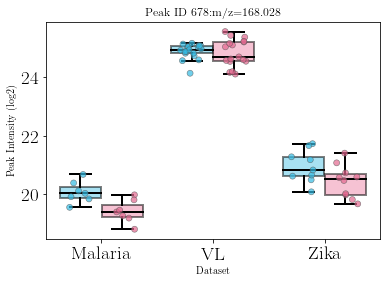

In [20]:
get_peak(peakinfolist_negative, 678).plot_boxplots(samples_values_filled_negative, osp+'negative_mode/')

In [114]:
get_peak(peakinfolist_negative, 1189).best_ms2_match_adduct.ms2spec.plot()

AttributeError: 'str' object has no attribute 'ms2spec'

In [93]:
print(get_peak(peakinfolist_negative, 1157))

Peak 1157: m/z = 233.18369580553727, rt = 3.3046956013301227 

                p-val: 0.00520086381425561, logFC = -0.5113524474483211 

                mm annotation:  

                std annotation:  

                hmdb annotation: Melatonin 

                
                {'frag_zik': <mnet.Spectrum object at 0x11efc1a60>} 



In [157]:
print(get_peak(peakinfolist_negative, 1453).spectra['frag_vl'])

Spectrum from scan 1852 in /Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/negative_mode/fragmentation/vl/FRAG_NEG_vl.mgf with 104 peaks, max_ms2_intensity 25000.0


In [159]:
print(get_peak(peakinfolist_negative, 1453).best_ms2_match_adduct.ms2spec)

Spectrum from scan None in HMDB0000673 with 138 peaks, max_ms2_intensity 100.0


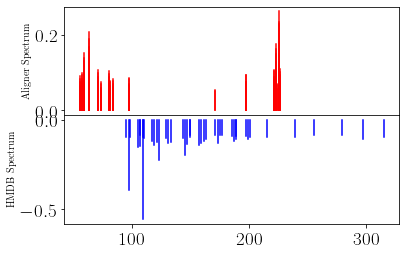

In [150]:
plot_mirror(list(get_peak(peakinfolist_negative, 1355).spectra.values())[0].normalised_peaks,
           get_peak(peakinfolist_negative, 1355).best_ms2_match_adduct.ms2spec.normalised_peaks)

In [151]:
get_peak(peakinfolist_negative, 1355).best_ms2_match_adduct.ms2spec.file_name

'HMDB0001830'

In [136]:
for peak in peakinfolist_negative:
    if peak.spectra:
        if type(peak.best_ms2_match_adduct) != str:
            if peak.best_ms2_match_adduct.ms2spec.precursor_mz > 350 and peak.best_ms2_match_adduct.ms2spec.precursor_mz < 355:
                print(peak)
                #print(peak.spectra[spectrum], peak.spectra[spectrum].parent_mz)

In [101]:
f peak.best_ms2_match_adduct.ms2spec.precursor_mz > 349 and peak.best_ms2_match_adduct.ms2spec.precursor_mz < 356:
            print(peak)
            print(peak.spectra[spectrum], peak.spectra[spectrum].parent_mz)

[(95.086197, 2.895054),
 (97.066154, 49.819059),
 (98.067413, 2.92186),
 (105.070061, 7.425278),
 (107.048409, 2.104276),
 (107.084991, 6.942769),
 (109.06604, 100.0),
 (109.103188, 2.734218),
 (110.067566, 3.149712),
 (117.070801, 4.262163),
 (119.085945, 6.46026),
 (121.101654, 4.985927),
 (123.080971, 16.324889),
 (129.069168, 3.122906),
 (131.084824, 5.508645),
 (133.101547, 4.664254),
 (143.086182, 3.176518),
 (145.101044, 12.062726),
 (147.11676, 6.004557),
 (149.095596, 2.238306),
 (149.130783, 2.975472),
 (157.102646, 6.15199),
 (159.115295, 5.3076),
 (161.132248, 4.503418),
 (163.10907, 3.752848),
 (171.117386, 2.278515),
 (173.132416, 5.414824),
 (175.148605, 2.171291),
 (177.129486, 2.251709),
 (185.132492, 2.47956),
 (187.146393, 4.355984),
 (189.127075, 3.511594),
 (189.164261, 2.506366),
 (197.13533, 2.559979),
 (199.150558, 3.551803),
 (201.162689, 3.055891),
 (215.179291, 2.881651),
 (239.178802, 2.895054),
 (255.206238, 2.332127),
 (279.21283, 2.198097),
 (297.220306, 

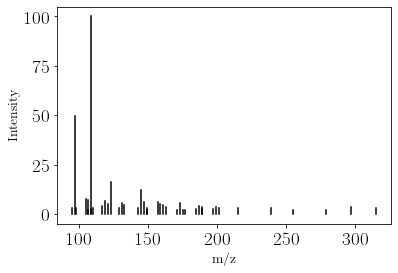

In [97]:
spec.plot()

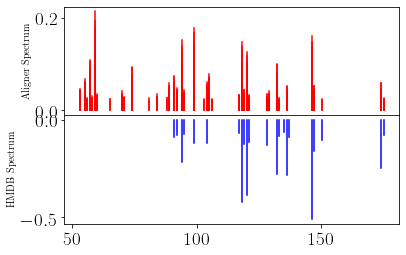

In [132]:
plot_mirror(list(get_peak(peakinfolist_positive, 1463).spectra.values())[0].normalised_peaks, 
             get_peak(peakinfolist_positive, 1463).best_ms2_match_adduct.ms2spec.normalised_peaks)

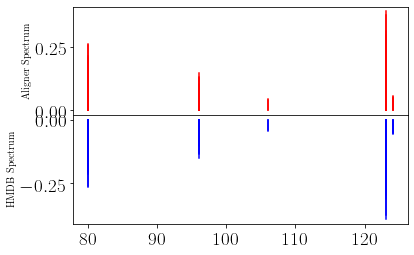

In [137]:
plot_mirror(list(get_peak(peakinfolist_positive, 298).spectra.values())[0].normalised_peaks,
           list(get_peak(peakinfolist_positive, 298).spectra.values())[0].normalised_peaks)

In [115]:
list(get_peak(peakinfolist_positive, 1189).spectra.values())[0].plot()

AttributeError: 'str' object has no attribute 'values'

In [ ]:
for peak in peakinfolist_positive:
    
    if peak.pval!=0:
        print(peak.cid, peak.std_annotation, peak.std_kegg_id, peak.mz, peak.pval, peak.logfc)
        print(peak.mm_annotation, peak.mm_kegg_id)
        normalised_peaks_top_list = []
        normalised_peaks_bottom_list = []

        if peak.best_ms2_match_adduct: 
            print(peak.best_ms2_match_adduct.name, ":",
                  metabolites[peak.best_ms2_match_adduct.hmdb][2],
                  metabolites[peak.best_ms2_match_adduct.hmdb][0],
                  metabolites[peak.best_ms2_match_adduct.hmdb][1],
                  metabolites[peak.best_ms2_match_adduct.hmdb][5], peak.best_ms2_match_adduct.score)
            if peak.best_ms2_match_adduct.ms2spec:
                    normalised_peaks_bottom = peak.best_ms2_match_adduct.ms2spec.normalised_peaks
                    normalised_peaks_bottom_list.append(normalised_peaks_bottom)


        if peak.spectra:

            spectra = peak.spectra

            for spectrum in spectra:

                normalised_peaks_top = spectra[spectrum].normalised_peaks
                normalised_peaks_top_list.append(normalised_peaks_top)



        for top in normalised_peaks_top_list:
            for bottom in normalised_peaks_bottom_list:
                plot_mirror(top, bottom)

        #metab_utils.plot_boxplots(samples_values_filled, str(peak.cid), 'ConditionDataset', (15,30), y = False )

        print('----')

In [136]:
print(list(get_peak(peakinfolist_positive, 298).spectra.values())[0])
print(list(get_peak(peakinfolist_positive, 298).spectra.values())[1])

Spectrum from scan 669 in /Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/pymz/mzmine/210120/mzmine_frag/mal/frag_pos_mal.mgf with 36 peaks, max_ms2_intensity 130000.0
Spectrum from scan 195 in /Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/pymz/mzmine/210120/mzmine_frag/zik/gnps2.mgf with 36 peaks, max_ms2_intensity 130000.0


In [119]:
print(list(get_peak(peakinfolist_positive, 1463).spectra.values())[0])

Spectrum from scan 3613 in /Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/pymz/mzmine/210120/mzmine_frag/vl/frag_pos_vl.mgf with 248 peaks, max_ms2_intensity 160000.0


In [45]:
print(get_peak(peakinfolist_positive, 712))

Peak 712: m/z = 154.04986931937086, rt = 6.717301560916661 

                p-val: 0.863414446913331, logFC = 0.269189245778421 

                mm annotation:  

                std annotation:  

                hmdb annotation:  

                
                 



In [18]:
for peak in peakinfolist_positive:
    print(peak.cid)

p633.0
p613.0
p3109.0
p3028.0
p2989.0
p2936.0
p324.0
p2938.0
p425.0
p2992.0
p2939.0
p926.0
p951.0
p3026.0
p101.0
p1236.0
p397.0
p168.0
p626.0
p365.0
p940.0
p3027.0
p893.0
p659.0
p2720.0
p2958.0
p3025.0
p2695.0
p1031.0
p1993.0
p2549.0
p1034.0
p2944.0
p2942.0
p2876.0
p1517.0
p2548.0
p1449.0
p2913.0
p2963.0
p952.0
p2982.0
p2987.0
p2912.0
p2898.0
p2921.0
p4343.0
p2725.0
p2724.0
p2666.0
p2897.0
p1839.0
p1238.0
p2895.0
p459.0
p1299.0
p2230.0
p2960.0
p3022.0
p970.0
p366.0
p2664.0
p2763.0
p835.0
p410.0
p2678.0
p2600.0
p2696.0
p3577.0
p2701.0
p2997.0
p2698.0
p2711.0
p2918.0
p1526.0
p3108.0
p2894.0
p2969.0
p2151.0
p785.0
p2743.0
p1463.0
p667.0
p2949.0
p2881.0
p2966.0
p634.0
p109.0
p2980.0
p1580.0
p2745.0
p2837.0
p614.0
p1100.0
p690.0
p121.0
p2961.0
p38.0
p2995.0
p2235.0
p2875.0
p2832.0
p2923.0
p2998.0
p264.0
p2800.0
p2320.0
p1450.0
p2925.0
p2934.0
p2693.0
p906.0
p535.0
p2985.0
p423.0
p1441.0
p253.0
p1078.0
p2384.0
p3317.0
p2315.0
p677.0
p676.0
p2842.0
p4735.0
p885.0
p1002.0
p2990.0
p1401.0
p3867

In [52]:
from rdkit import Chem,DataStructs
mol1 = Chem.MolFromSmiles("CC(C)C=CCCCCC(=O)NCc1ccc(c(c1)OC)O")
mol2 = Chem.MolFromSmiles("COC1=C(C=CC(=C1)C=O)O")
fp1 = Chem.RDKFingerprint(mol1)
fp2 = Chem.RDKFingerprint(mol2)
print("RDK fingerprint: ",DataStructs.TanimotoSimilarity(fp1,fp2))


ModuleNotFoundError: No module named 'rdkit'

In [96]:
get_peak_info(1463)

peak 1463: 209.09213899311263, 9.323316198803509 

                p-val: 0.000125347662993327, 4.07637391147651 

                ['porphobilinogen', 'l-kynurenine$formyl-5-hydroxykynurenamine'] 

                ['Tryptophan metabolism', 'Porphyrin metabolism'] 

                C00328;C05647 

                {'frag_pos_vl': <mnet.Spectrum object at 0x12c9cf910>} 


                <peakinfo.Adduct object at 0x12f4e0d60> 0.588843857846385


In [139]:
with open(osp+'pymz/mzmine/peak_picked_files/peakinfolist.dict', 'wb') as handle:
    pickle.dump(peakinfolist, handle)

In [ ]:
# plot heatmap
g = sns.clustermap(group_intensities, center=0, cmap='vlag', col_colors=group_colours,
                       col_cluster=False, linewidths=0.75, cbar_pos=(0.1, 0.05, 0.05, 0.18))

plt.suptitle('Formula Hits in Pathways', y=0.85)

# draw group legend
for group in used_groups:
    g.ax_col_dendrogram.bar(0, 0, color=group_lut[group], label=group, linewidth=0)
g.ax_col_dendrogram.legend(loc="right")

    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

    # render plot
    st.pyplot()

    data = []
    for idx in members:
        formula = ','.join(dataset_row_id_to_unique_ids[idx])
        row = [idx, formula]
        data.append(row)
    data_df = pd.DataFrame(data, columns=['Row Index', 'Formula Annotations'])

## Prepare data for PALS and reactome


In [ ]:
sample_values_negative

In [81]:
cids = []
keggs = []
for peak in peakinfolist_positive:
    if peak.pval != 0:
        cids.append(peak.cid)
        #save it like this for pals
        keggs.append(str(peak.get_possible_kegg_ids()).translate({ord('['): '', ord(']'): '', ord('\''): ''}))
        print(peak.get_possible_kegg_ids())
            
            
        

['C00418']
['C00906' 'C00064' 'C00047']
NaN
NaN
NaN
NaN
['C00245' 'C00245']
NaN
['C02642' 'C00152']
NaN
NaN
['C00064' 'C05100' 'C00819']
NaN
NaN
['C00906']
NaN
['C01879' 'C04281' 'C04282']
['C05522' 'C00380' 'C00380']
NaN
['C02238']
NaN
NaN
NaN
['C00418']
NaN
NaN
NaN
NaN
NaN
NaN
['C06124']
NaN
NaN
NaN
NaN
NaN
['C06124']
NaN
NaN
NaN
['C02727']
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
['C00491' 'C00491']
NaN
NaN
['C00155' None]
NaN
NaN
NaN
NaN
NaN
['C00217' 'C00025' 'C05938' 'C00408']
['tmndnccrn']
NaN
NaN
NaN
NaN
['C02990']
['dcsptn1crn' 'clpndcrn']
['C05587' 'C07453' 'C00250']
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
['C00410']
NaN
NaN
['C00328' 'C05647' 'C00328' 'C00328']
['C00073' 'C00073' 'C00073']
NaN
NaN
NaN
['C00064' 'C05100' 'C00819']
['C05519' 'C00188']
NaN
NaN
NaN
NaN
['C00064' 'C05100' 'C00819']
['C13747' 'C07480' 'C01586']
['C00073' None]
['C00073']
NaN
['C05519' 'C00188' 'C00408']
NaN
['C02838']
NaN
NaN
NaN
NaN
['C00483' 'C01183' 'C02735' 'C00079']
NaN
NaN
NaN
NaN
NaN
['c226crn']

In [82]:
annotation_df = pd.DataFrame((cids, keggs), ('peak_id', 'entity_id' )).transpose()

In [83]:
annotation_df

,peak_id,entity_id
0,633,C00418
1,613,C00906 C00064 C00047
2,3109,NaN
3,3028,NaN
4,2989,NaN
...,...,...
620,541,NaN
621,240,C00956 C00719 C00719
622,191,CE4788 C00763 C00148
623,1154,NaN


In [84]:
annotation_df.to_csv(osp+'pals_analysis/annotation.csv',index=False)

In [67]:
pd.read_csv(osp+'pals_analysis/annotation.csv')

,peak_id,entity_id
0,633,['C00418']
1,613,['C00906' 'C00064' 'C00047']
2,3109,[]
3,3028,[]
4,2989,[]
...,...,...
620,541,[]
621,240,['C00956' 'C00719' 'C00719']
622,191,['CE4788' 'C00763' 'C00148']
623,1154,[]


In [104]:
samples_values.columns = kid

In [101]:
kid =[]
for i in samples_values.columns:
    if int(i):
        peak = get_peak(peakinfolist_positive, int(i))
        kid.append(peak.get_possible_kegg_ids()[0])

ValueError: invalid literal for int() with base 10: 'Condition'

In [103]:
kid.append('Condition')
kid.append('Dataset')
kid.append('Condition')


In [106]:
samples_values = samples_values.transpose()

In [112]:
samples_values = samples_values[~samples_values.index.duplicated(keep='first')]

In [113]:
samples_values.to_csv(osp+'ss.csv')

## RT grouping

In [113]:
import numpy as np

In [114]:
def create_bins_mz_range(lista, n_bins):
    lista.sort()
    lowest_value = np.min(lista)-0.001
    highest_value = np.max(lista)+0.001
    width = (highest_value - lowest_value)/n_bins
    bins = []
    for i in range(n_bins):
        bins.append((lowest_value+width*i, lowest_value+width*(i+1)))
    nb = [i[0] for i in bins]
    nb.append(bins[-1][1])
    return bins

In [115]:
peakinfolist = peakinfolist_positive

In [116]:
rt = []
for peak in peakinfolist:
    rt.append(peak.rt)
bins = create_bins_mz_range(rt, 10)

In [117]:
bins

[(2.9269174575490164, 4.304436214450107),
 (4.304436214450107, 5.681954971351198),
 (5.681954971351198, 7.059473728252289),
 (7.059473728252289, 8.43699248515338),
 (8.43699248515338, 9.814511242054472),
 (9.814511242054472, 11.192029998955562),
 (11.192029998955562, 12.569548755856653),
 (12.569548755856653, 13.947067512757744),
 (13.947067512757744, 15.324586269658836),
 (15.324586269658836, 16.702105026559927)]

In [140]:
peakbins = []
for peak in peakinfolist:
    if bins[2][0]<=peak.rt<=bins[2][1]:
        peakbins.append(peak)

In [141]:
print(peakbins)

[<peakinfo.PeakInfo object at 0x121b3f790>, <peakinfo.PeakInfo object at 0x121d2c190>, <peakinfo.PeakInfo object at 0x121c2e640>, <peakinfo.PeakInfo object at 0x121cf9250>, <peakinfo.PeakInfo object at 0x121cf90d0>, <peakinfo.PeakInfo object at 0x121b52be0>, <peakinfo.PeakInfo object at 0x121bc39a0>, <peakinfo.PeakInfo object at 0x121d43b80>, <peakinfo.PeakInfo object at 0x121d434c0>, <peakinfo.PeakInfo object at 0x121d43040>, <peakinfo.PeakInfo object at 0x121cee460>, <peakinfo.PeakInfo object at 0x121d50640>, <peakinfo.PeakInfo object at 0x121d35070>, <peakinfo.PeakInfo object at 0x121d356d0>, <peakinfo.PeakInfo object at 0x121d35eb0>, <peakinfo.PeakInfo object at 0x121d5a250>, <peakinfo.PeakInfo object at 0x121c24a30>, <peakinfo.PeakInfo object at 0x121c24ee0>, <peakinfo.PeakInfo object at 0x121c560d0>, <peakinfo.PeakInfo object at 0x121d6c640>, <peakinfo.PeakInfo object at 0x121d837c0>, <peakinfo.PeakInfo object at 0x121d83340>, <peakinfo.PeakInfo object at 0x121db6af0>, <peakinfo.

In [142]:
for peak in peakbins:
    peak.add_adduct_list()
    #print(peak.adducts)

In [143]:
def calculate_tolerance(x, ppm):
    tolerance = x*ppm/1000000
    return tolerance

In [122]:
#assuming mz is h+ 
def calculate_adducts(mz):
    PROTON = 1.00727646677
        
    addList = [
         (mz + 1.0034, 'M(C13)+H[1+]'),
         ((mz + 0.5017)/2, 'M(C13)+2H[2+]'),
         ((mz + 0.3344)/3, 'M(C13)+3H[3+]'),
         (mz + 1.9958 , 'M(S34)+H[1+]'),
         (mz + 1.9972 , 'M(Cl37)+H[1+]'),
         (mz + 21.9820 , 'M+Na[1+]'),
         ((mz + 10.991 )/2, 'M+H+Na[2+]'),
         (mz + 37.9555 , 'M+K[1+]'),
         (mz + 18.0106 , 'M+H2O+H[1+]'),
         (mz - 18.0106 , 'M-H2O+H[1+]'),
         (mz - 36.0212 , 'M-H4O2+H[1+]'),
         (mz - 17.0265 , 'M-NH3+H[1+]'),
         (mz - 27.9950 , 'M-CO+H[1+]'),
         (mz - 43.9898 , 'M-CO2+H[1+]'),
         (mz - 46.0054 , 'M-HCOOH+H[1+]'),
         (mz + 67.9874 , 'M+HCOONa[1+]'),
         (mz - 67.9874 , 'M-HCOONa+H[1+]'),
         (mz + 57.9586 , 'M+NaCl[1+]'),
         (mz - 72.0211 , 'M-C3H4O2+H[1+]'),
         (mz + 83.9613 , 'M+HCOOK[1+]'),
         (mz - 83.9613 , 'M-HCOOK+H[1+]')]
    return addList


In [123]:
def is_adduct(mz, mzh, ppm):
    adducts = calculate_adducts(mzh)
    for adduct in adducts:
        if adduct[0]-calculate_tolerance(adduct[0], ppm) <= mz <= adduct[0]+calculate_tolerance(adduct[0], ppm):
            return True, adduct
    else:
        return False, mz

In [144]:
clusters = []
for n in range(len(peakbins)):

    cluster = []
    cluster.append((peakbins[n], peakbins[n].adducts[0]))
    
    for i in range(len(peakbins)):
        if i !=n :
            isadduct, adduct = is_adduct(peakbins[i].mz, peakbins[n].mz, 10)
            if isadduct:
                
                cluster.append((peakbins[i], adduct))
    if len(cluster) > 1:
        clusters.append(cluster)

In [145]:
len(clusters)

50

In [146]:
import matplotlib.pyplot as plt

In [147]:
clusters.sort(key=len, reverse=True)

In [150]:
for p, a in clusters[2]:
    print(a,p)

(203.11586527372782, 'M+H[1+]', '') Peak 1420: m/z = 204.12314174049783, rt = 6.7126722887246 

                p-val: 0.07655438056027601, logFC = -0.252653203396115 

                mm annotation:  

                std annotation:  

                hmdb annotation:  


                 

(168.10194174049784, 'M-H4O2+H[1+]') Peak 3577: m/z = 168.1019774350253, rt = 6.7144123909849425 

                p-val: 0.000481732044298059, logFC = -8.996025354335519 

                mm annotation:  

                std annotation:  

                hmdb annotation:  


                 

(186.11254174049782, 'M-H2O+H[1+]') Peak 1155: m/z = 186.1125254380076, rt = 6.710805629729081 

                p-val: 0.18215856199293698, logFC = 0.19816685887642999 

                mm annotation:  

                std annotation:  

                hmdb annotation:  


                 

(187.09664174049783, 'M-NH3+H[1+]') Peak 1174: m/z = 187.09654182111717, rt = 6.709446793269004 

              

In [184]:
peakinfo

Object `.sort()` not found.


2


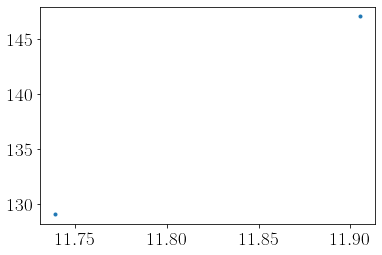

4


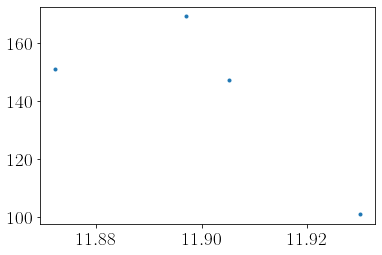

4


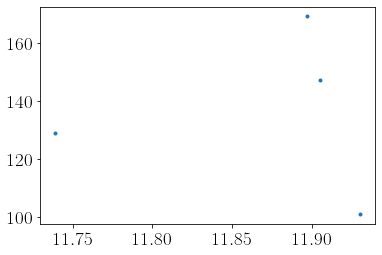

3


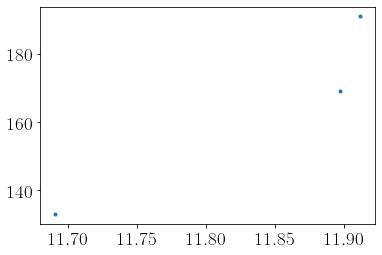

4


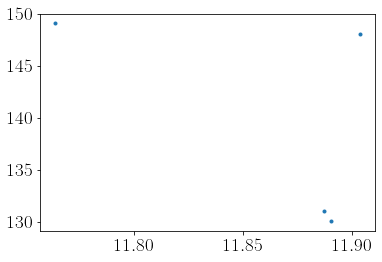

3


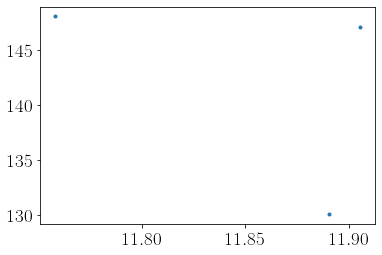

3


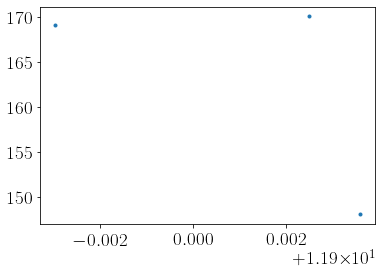

2


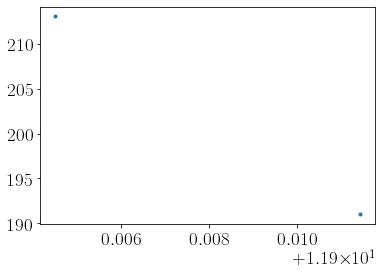

3


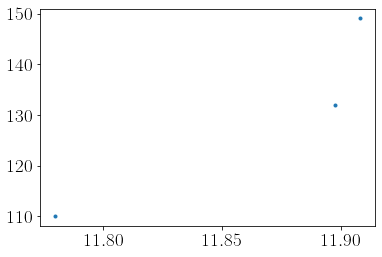

3


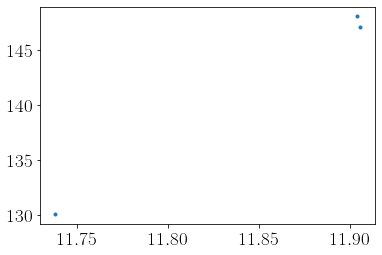

5


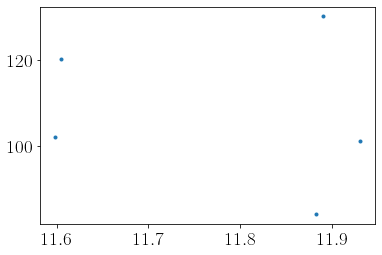

3


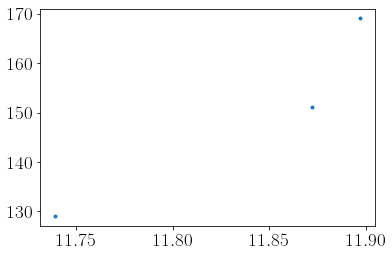

2


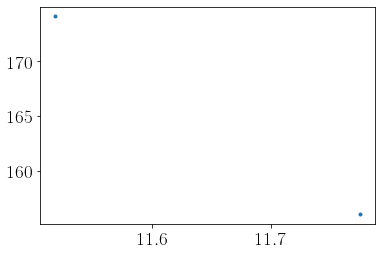

2


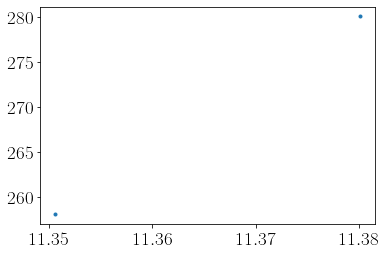

2


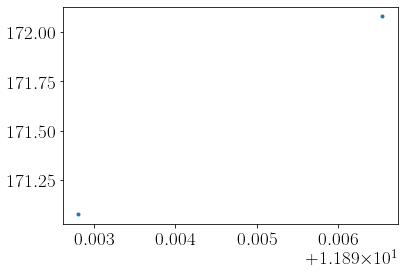

2


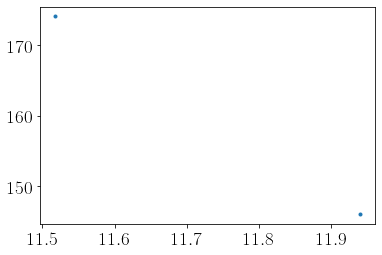

3


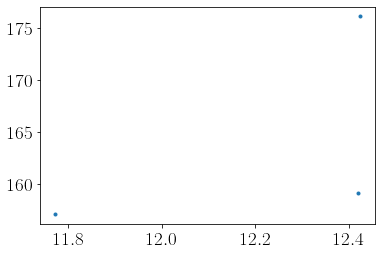

3


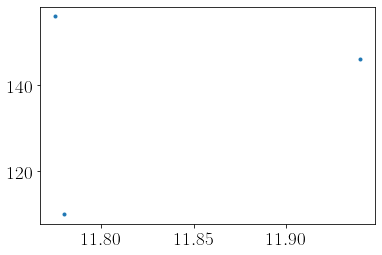

2


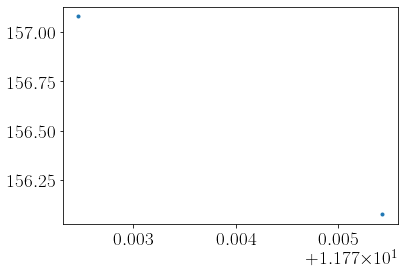

2


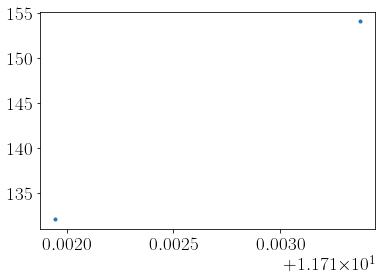

2


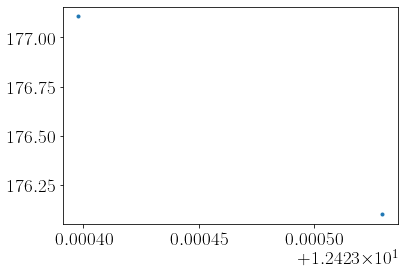

2


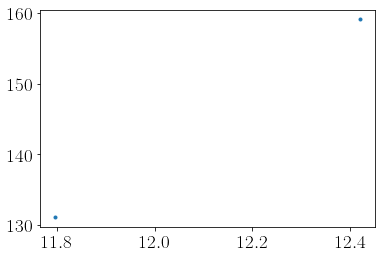

2


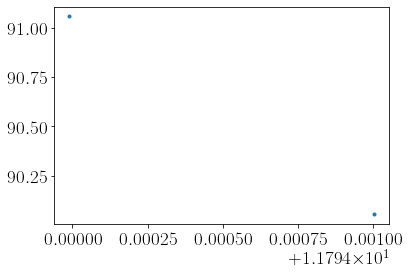

2


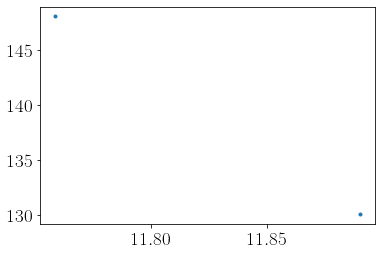

3


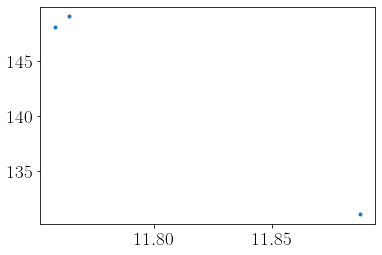

2


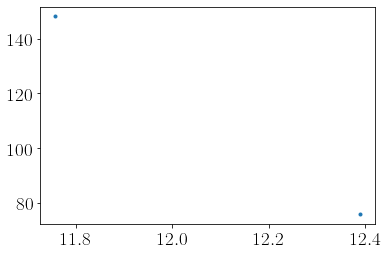

2


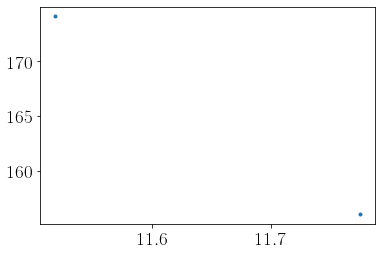

2


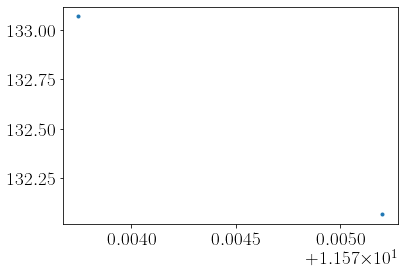

2


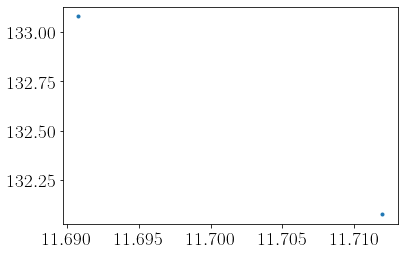

2


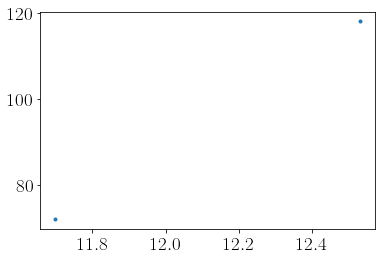

2


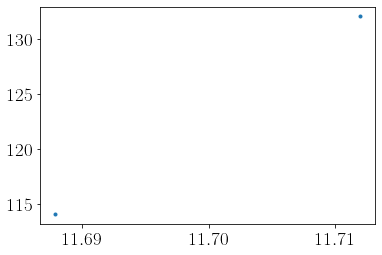

3


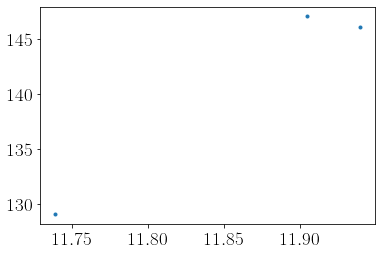

2


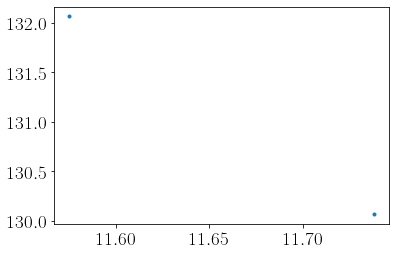

3


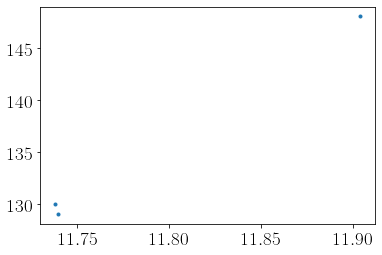

3


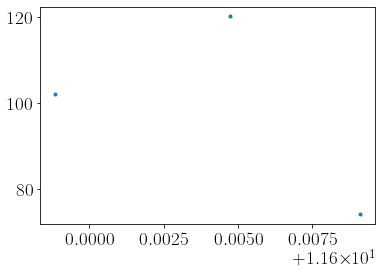

3


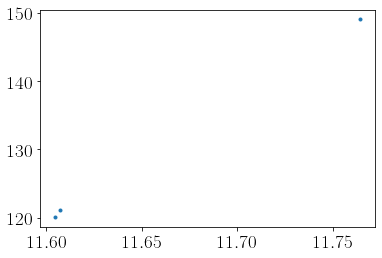

3


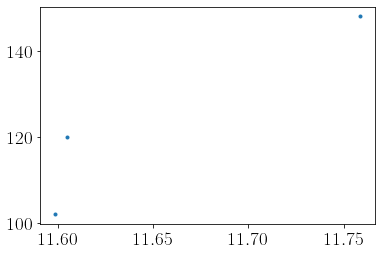

2


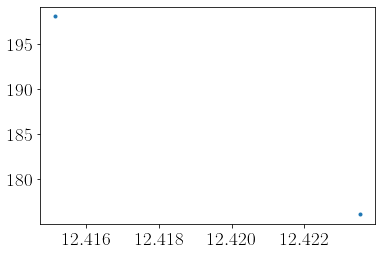

2


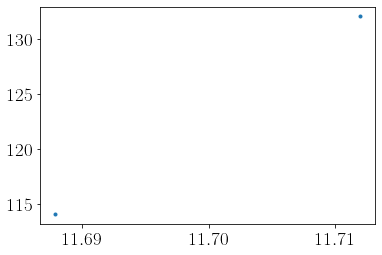

2


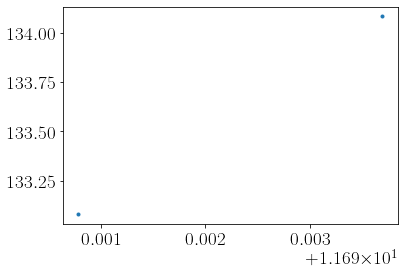

5


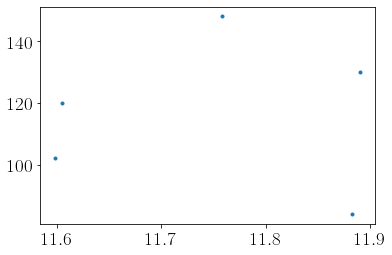

In [177]:
for c in clusters:
    print(len(c))
    mz = []
    rt = []
    for p,a in c:
        mz.append(p.mz)
        rt.append(p.rt)
    plt.plot(rt, mz, '.')
    plt.show()